# 1. Introduction

**Title** <br>Predicting Movie Success <br><br>
**Participants** <br>Aleksandra Adamczak, and Saran Singh <br><br>

**Overview** <br>
With this assignment, our goal is to develop a machine learning model to predict movie revenue based on key features.

We aim to predict a movie's financial success, which is crucial for production and marketing decisions.
<br>
Many factors affect the success of a movie, and this project aims to explore and identify those key factors.

# 2. Data Exploration

We have two different data sources, both from Kaggle. 
- **Primary Data Source**: https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/data
- **Additional Data Source**: https://www.kaggle.com/datasets/phiitm/late-night-talk-show-youtube-dataset
---

<h4 style="margin-bottom: 0;">Primary Data Source:</h4>
This dataset contains a collection of 1,000,000 movies from the TMDB database.

We will use the following CSV files as our primary data sources:
1. `tmdb_5000_credits.csv`: Contains information about the cast and crew of each movie.  
2. `tmdb_5000_movies.csv`: Contains information about the movies.  
---

<h4 style="margin-bottom: 0;">Additional Data Source:</h4>
Both <b>Youtube</b>, and <b>Late Night Talk Shows</b> are very popular, we will use YouTube data from the Talk Shows to explore specific hypotheses, like does late-night promotions impact metrics like opening weekend revenue, etc.

We have data from the following six talk shows:
- Conan
- James Corden  
- Jimmy Fallon  
- Jimmy Kimmel  
- Seth Meyers  
- Stephen Colbert

---


### 2.1 Understand - Primary Dataset

In [1784]:
import pandas as pd
credits_df = pd.read_csv('Data- movies/Movies/tmdb_5000_credits.csv')
movies_df = pd.read_csv('Data- movies/Movies/tmdb_5000_movies.csv')

# Data structure overview
print(movies_df.info())
print(credits_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Key Observations:
<br>
We have two datasets:
<br>
- Dataset 1: `movies_df`
    - This dataset seems to contain attributes related to movies.
    - **Shape**: 4,803 rows and 20 columns.
    - **Columns**: We have a mix of numerical like `budget`, `revenue`, `runtime` and categorical values like `genres`, `original_language`.
<br>
<br>
- Dataset 2: `credits_df`
    - This dataset contains cast, and crew information.
    - **Shape**: 4,803 rows and 4 columns.
    - **Columns**: `movie_id`, `title`, `cast`, and `crew`. `movie_id` contains numerical values, and rest cateogrical. 
<br>
- Both datasets seem to be connected via shared key which is <b> id </b> in `movies_df` and <b> movie_id </b> in `credits_df`, we will explore this further as this will help merge data easier.


2.2 Potential target variables

In [1785]:
print("Potential target variables:\n", movies_df[['revenue', 'vote_count', 'popularity', 'budget']].head())

Potential target variables:
       revenue  vote_count  popularity     budget
0  2787965087       11800  150.437577  237000000
1   961000000        4500  139.082615  300000000
2   880674609        4466  107.376788  245000000
3  1084939099        9106  112.312950  250000000
4   284139100        2124   43.926995  260000000


### 2.3 Missing values

In [1786]:
movies_missing_values = movies_df.isnull().sum()
credits_missing_values = credits_df.isnull().sum()


movies_missing_values = movies_missing_values[movies_missing_values > 0]
credits_missing_values = credits_missing_values[credits_missing_values > 0]

print("Movies- Columns with missing values:")
print(movies_missing_values)

print("Crew- Columns with missing values:")
print(credits_missing_values)


Movies- Columns with missing values:
homepage        3091
overview           3
release_date       1
runtime            2
tagline          844
dtype: int64
Crew- Columns with missing values:
Series([], dtype: int64)


### 2.4 Zero values

In [1787]:
zero_values_movies = {}

for column in movies_df.columns:
    zero_count = (movies_df[column] == 0).sum()
    zero_values_movies[column] = zero_count

zero_values_movies = {key: value for key, value in zero_values_movies.items() if value > 0}

print("Columns with zero values - Movies:")
print(zero_values_movies)

# Let's do it for credits as well
zero_values_credits = {}

for column in credits_df.columns:
    zero_count = (credits_df[column] == 0).sum()
    zero_values_credits[column] = zero_count

zero_values_credits = {key: value for key, value in zero_values_credits.items() if value > 0}

print("\nColumns with zero values - Credits:")
print(zero_values_credits)

Columns with zero values - Movies:
{'budget': np.int64(1037), 'popularity': np.int64(1), 'revenue': np.int64(1427), 'runtime': np.int64(35), 'vote_average': np.int64(63), 'vote_count': np.int64(62)}

Columns with zero values - Credits:
{}


Observation:

We have a significant amount of zero values and missing values in the movies dataframe, while the credits dataframe does not contain any missing or zero values. However, given the large dataset available, we still have a very good amount of usable data.
We will further investigate these columns to decide on an action plan for handling them

### 2.5 Combine Datasets

We currently have two datasets in our Primary dataset: one containing movie details and the other with cast and crew information.

We also have another 5 data sources as our additonal datasets which are related to the talk shows.

Our goal is to merge these datasets into a single dataframe by extracting valuable insights. We will do it now since the next step is Splitting the data for test/train.

We will first explore this dataset to understand its structure and contents, then decide what specific information to extract and combine with the movie dataset.

We will start with the `credits_df`

In [1788]:
# Preview the credits dataset
print("First 5 rows of credits dataset:")
print(credits_df) 

First 5 rows of credits dataset:
      movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4798      9367                               El Mariachi   
4799     72766                                 Newlyweds   
4800    231617                 Signed, Sealed, Delivered   
4801    126186                          Shanghai Calling   
4802     25975                         My Date with Drew   

                                                   cast  \
0     [{"cast_id": 242, "character": "Jake Sully", "...   
1     [{"cast_id": 4, "character": "Captain Jack Spa...   
2     [{"cast_id": 1, "character": "James Bond", "cr...   
3     [{"c

Obervations:
- `movie_id`:
    - This will be useful for merging with the main movies dataset.
- `title`:
    - We could also use the title for merging, but its more reliable to use the  id.
- `cast`: Contains JSON-like strings detailing the cast members.

Lets expand the cast column to visualize the data better and understand it.

In [1789]:
# View a single row's JSON content
import json

json_data = credits_df['cast'].iloc[0]  # First row
print(json.dumps(json_data, indent=4))  # Pretty-print JSON

"[{\"cast_id\": 242, \"character\": \"Jake Sully\", \"credit_id\": \"5602a8a7c3a3685532001c9a\", \"gender\": 2, \"id\": 65731, \"name\": \"Sam Worthington\", \"order\": 0}, {\"cast_id\": 3, \"character\": \"Neytiri\", \"credit_id\": \"52fe48009251416c750ac9cb\", \"gender\": 1, \"id\": 8691, \"name\": \"Zoe Saldana\", \"order\": 1}, {\"cast_id\": 25, \"character\": \"Dr. Grace Augustine\", \"credit_id\": \"52fe48009251416c750aca39\", \"gender\": 1, \"id\": 10205, \"name\": \"Sigourney Weaver\", \"order\": 2}, {\"cast_id\": 4, \"character\": \"Col. Quaritch\", \"credit_id\": \"52fe48009251416c750ac9cf\", \"gender\": 2, \"id\": 32747, \"name\": \"Stephen Lang\", \"order\": 3}, {\"cast_id\": 5, \"character\": \"Trudy Chacon\", \"credit_id\": \"52fe48009251416c750ac9d3\", \"gender\": 1, \"id\": 17647, \"name\": \"Michelle Rodriguez\", \"order\": 4}, {\"cast_id\": 8, \"character\": \"Selfridge\", \"credit_id\": \"52fe48009251416c750ac9e1\", \"gender\": 2, \"id\": 1771, \"name\": \"Giovanni R

Observation:
<br>
The JSON data above contains a list of cast members, with following details:
<br>
`cast_id:` A unique identifier for the cast memebers.
<br>
`character:` The character name played by the actor in the movie.
<br>
`credit_id:` A unique identifier for the credit record.
<br>
`gender:` Represents the gender of the actor (1 = female, 2 = male, 0 = unspecified/unknown).
<br>
`id:` A unique ID for the actor.
<br>
`name:` The name of the actor.
<br>
`order:` The billing order of the actor in the movie credits.


We have decided to extract following for each movie:
<br>
- Crew information:
    - Director's name.
    - Writers' names.
    - Producers' names.
    - Total crew size.
<br>
- Main actors:
    - Names of up to 3 main actors.
    - Genders of those actors.

In [1790]:
# Extraction of Main Actors data
import ast

def extract_main_actors(cast_column, max_actors=3):
    """
    Extracts the names and genders of the main actors from the cast column.
    """
    actor_names = []
    actor_genders = []
    
    for entry in cast_column:
        try:
            cast_data = ast.literal_eval(entry)
            cast_data = sorted(cast_data, key=lambda x: x.get('order', float('inf')))
            
            # Extract actor names and genders
            names = [cast_data[i].get('name', None) for i in range(min(len(cast_data), max_actors))]
            genders = [cast_data[i].get('gender', None) for i in range(min(len(cast_data), max_actors))]
            
            # Pad with None if fewer than max_actors
            while len(names) < max_actors:
                names.append(None)
                genders.append(None)
        except (ValueError, SyntaxError):
            # Handle invalid JSON-like strings
            names = [None] * max_actors
            genders = [None] * max_actors
        
        actor_names.append(names)
        actor_genders.append(genders)
    
    return actor_names, actor_genders

# Apply the function to the `credits_df`
actor_names, actor_genders = extract_main_actors(credits_df['cast'], max_actors=3)

# Add the results as separate columns
credits_df['main_actor_names'] = actor_names
credits_df['main_actor_genders'] = actor_genders

# Verify results
print(credits_df[['movie_id', 'main_actor_names', 'main_actor_genders']].head())


   movie_id                                  main_actor_names  \
0     19995  [Sam Worthington, Zoe Saldana, Sigourney Weaver]   
1       285     [Johnny Depp, Orlando Bloom, Keira Knightley]   
2    206647      [Daniel Craig, Christoph Waltz, Léa Seydoux]   
3     49026      [Christian Bale, Michael Caine, Gary Oldman]   
4     49529    [Taylor Kitsch, Lynn Collins, Samantha Morton]   

  main_actor_genders  
0          [2, 1, 1]  
1          [2, 2, 1]  
2          [2, 2, 1]  
3          [2, 2, 2]  
4          [2, 1, 1]  


In [1791]:
# Extraction of crew data

import ast

def extract_crew_info(crew_list, job_title):
    """Extract crew member names based on their job title."""
    try:
        crew = ast.literal_eval(crew_list)
        return [member['name'] for member in crew if member['job'] == job_title]
    except (ValueError, SyntaxError):
        return []

def calculate_crew_size(crew_list):
    """Calculate the total number of crew members."""
    try:
        crew = ast.literal_eval(crew_list)
        return len(crew)
    except (ValueError, SyntaxError):
        return 0

# Extract Directors
credits_df['directors'] = credits_df['crew'].apply(lambda x: extract_crew_info(x, 'Director'))

# Extract Writers
credits_df['writers'] = credits_df['crew'].apply(lambda x: extract_crew_info(x, 'Writer'))

# Extract Producers
credits_df['producers'] = credits_df['crew'].apply(lambda x: extract_crew_info(x, 'Producer'))

# Calculate Crew Size
credits_df['crew_size'] = credits_df['crew'].apply(calculate_crew_size)

# Display the first few rows of the new columns
print(credits_df[['movie_id', 'directors', 'writers', 'producers', 'crew_size']].head())



   movie_id            directors          writers  \
0     19995      [James Cameron]  [James Cameron]   
1       285     [Gore Verbinski]               []   
2    206647         [Sam Mendes]               []   
3     49026  [Christopher Nolan]               []   
4     49529     [Andrew Stanton]               []   

                                           producers  crew_size  
0                        [James Cameron, Jon Landau]        153  
1  [Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe...         32  
2              [Barbara Broccoli, Michael G. Wilson]        155  
3    [Charles Roven, Christopher Nolan, Emma Thomas]        217  
4        [Colin Wilson, Jim Morris, Lindsey Collins]        132  


Obeservation:
<br>
We notice that most movies have a single director, as expected. We also notice that the writers column is empty for some rows, which might indicate missing data, if it is indeed empty, we can tag it unknown.
Crew size vary significantly, reflecting the scale of production for each movie, this column helps provide a peak into the resourcess allocated for each movie which we would explore further.
<br>
<br>
Since some of the writers rows were empty. Lets first check for empty values in the extracted columns.

In [1792]:
# Columns to check for missing or empty data
columns_to_check = ['main_actor_names', 'main_actor_genders', 'directors', 'writers', 'producers']

# Function to count missing or empty values
def count_missing_or_empty(column):
    return credits_df[column].apply(lambda x: len(x) == 0 if isinstance(x, list) else pd.isnull(x)).sum()

# Check all specified columns
missing_data_summary = {col: count_missing_or_empty(col) for col in columns_to_check}

# Display the results
for column, count in missing_data_summary.items():
    print(f"{column}: {count} missing rows")


main_actor_names: 0 missing rows
main_actor_genders: 0 missing rows
directors: 30 missing rows
writers: 3252 missing rows
producers: 1023 missing rows


Observations:
<br>
We do have some significat missing data.

- For features like writers, directors, and producers, we will be replacing missing values with placeholders  "Unknown".

Let's proceed with replacing the missing values.

In [1793]:
# Replace missing values in the specified columns with "Unknown"
columns_to_replace = ['writers', 'directors', 'producers']

for column in columns_to_replace:
    credits_df[column] = credits_df[column].apply(lambda x: x if len(x) > 0 else ["Unknown"])

# Verify the changes
print("Updated 'writers', 'directors', and 'producers' columns:")
print(credits_df[['writers', 'directors', 'producers']].head())


Updated 'writers', 'directors', and 'producers' columns:
           writers            directors  \
0  [James Cameron]      [James Cameron]   
1        [Unknown]     [Gore Verbinski]   
2        [Unknown]         [Sam Mendes]   
3        [Unknown]  [Christopher Nolan]   
4        [Unknown]     [Andrew Stanton]   

                                           producers  
0                        [James Cameron, Jon Landau]  
1  [Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe...  
2              [Barbara Broccoli, Michael G. Wilson]  
3    [Charles Roven, Christopher Nolan, Emma Thomas]  
4        [Colin Wilson, Jim Morris, Lindsey Collins]  


In [1794]:
#  Lets confirm that it worked.

# Columns to check for missing or empty data
columns_to_check = ['main_actor_names', 'main_actor_genders', 'directors', 'writers', 'producers']

# Function to count missing or empty values
def count_missing_or_empty(column):
    return credits_df[column].apply(lambda x: len(x) == 0 if isinstance(x, list) else pd.isnull(x)).sum()

# Check all specified columns
missing_data_summary = {col: count_missing_or_empty(col) for col in columns_to_check}

# Display the results
for column, count in missing_data_summary.items():
    print(f"{column}: {count} missing rows")

# Count how many unknowns are there- just to sure that it matches the missing values we had before.
unknown_directors = credits_df['directors'].apply(lambda x: 'Unknown' in x).sum()
unknown_writers = credits_df['writers'].apply(lambda x: 'Unknown' in x).sum()
unknown_producers = credits_df['producers'].apply(lambda x: 'Unknown' in x).sum()
print(f"Unknown directors: {unknown_directors}")
print(f"Unknown writers: {unknown_writers}")
print(f"Unknown producers: {unknown_producers}")

main_actor_names: 0 missing rows
main_actor_genders: 0 missing rows
directors: 0 missing rows
writers: 0 missing rows
producers: 0 missing rows
Unknown directors: 30
Unknown writers: 3252
Unknown producers: 1023


Lets proceed with merging the datasets.  
We need to ensure that we only merge the movies that are currently present in out movies dataframe since some of the rows were removed.

In [1795]:
# Merge the movies_df with the processed credits_df
movies_df = pd.merge(movies_df, credits_df, left_on='id', right_on='movie_id', how='inner')

# Verify the results of the merge
print("Merged DataFrame shape:", movies_df.shape)
print("Merged DataFrame preview:")
print(movies_df.head())

# Check for any movies in movies_df that did not have matching records in credits_df
unmatched_movies = movies_df[~movies_df['id'].isin(credits_df['movie_id'])]
print(f"\nNumber of unmatched movies: {unmatched_movies.shape[0]}")

Merged DataFrame shape: (4803, 30)
Merged DataFrame preview:
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"},

Now lets look at the talk shows dataset.

We will begin with `Conan`.

In [1796]:
conan_df = pd.read_csv('Data- movies/Talk_Show/Conan.csv')

# print a few rows for each column
print(conan_df.head())

     publishedAtSQL                                         videoTitle  \
0  12-06-2020 12:00  Deon Cole On White Protester Signs That Missed...   
1  11-06-2020 23:34  Nicole Byer On Finding Humor In Pain - CONAN o...   
2  11-06-2020 23:32  Sona Crashes Conan's Interview With Nicole Bye...   
3  11-06-2020 00:00  Senator Cory Booker On This Crossroads In Amer...   
4  10-06-2020 21:03  Senator Cory Booker Wants This To Be A Moral M...   

                                    videoDescription videoCategoryId  \
0  Deon Cole shares some white protester signs th...              23   
1  Nicole Byer on racial inequality in healthcare...              23   
2  Sona is a huge fan of Nicole Byer, “Nailed It!...              23   
3  Senator Cory Booker discusses the killing of G...              23   
4  Senator Cory Booker discusses President Trump’...              23   

  videoCategoryLabel durationSec definition caption  licensedContent  \
0             Comedy         124         hd   Fals

The data here seems fairly new. Let's find the oldest record in the dataset to determine if we can match it with movies in our existing dataset released during the same period. If not, it may not be as useful and could introduce bias.

In [1797]:
# Convert 'publishedAtSQL' to datetime format with dayfirst=True
try:
    conan_df['publishedAtSQL'] = pd.to_datetime(conan_df['publishedAtSQL'], dayfirst=True)
except Exception as e:
    raise

# Display the first 5 records of the 'publishedAtSQL' column sorted by earliest date for Conan dataset
sorted_published_dates = conan_df.sort_values(by='publishedAtSQL', ascending=True)['publishedAtSQL'].head()
print ("\nEarliest published dates in Conan dataset:")
print(sorted_published_dates)

# Sort by 'publishedAtSQL' in descending order and display the first 5 rows
newest_published_dates = conan_df.sort_values(by='publishedAtSQL', ascending=False)[['publishedAtSQL']].head()
print("\nNewest published dates in Conan dataset:")
print(newest_published_dates)

# Display the first 5 records of the 'release_date' column sorted by earliest date for Movies dataset
sorted_release_dates1 = movies_df.sort_values(by='release_date', ascending=True)['release_date'].head()
print("\nEarliest release dates in movies dataset:")
print(sorted_release_dates1)

# Sort by 'release_date' in descending order and display the first 5 rows
newest_release_dates = movies_df.sort_values(by='release_date', ascending=False)[['release_date']].head()
print("\nNewest release dates in movies dataset:")
print(newest_release_dates)


Earliest published dates in Conan dataset:
8724   2010-08-19 15:57:00
8723   2010-08-23 22:34:00
8722   2010-08-25 23:06:00
8721   2010-08-26 00:21:00
8720   2010-08-27 00:47:00
Name: publishedAtSQL, dtype: datetime64[ns]

Newest published dates in Conan dataset:
       publishedAtSQL
0 2020-06-12 12:00:00
1 2020-06-11 23:34:00
2 2020-06-11 23:32:00
3 2020-06-11 00:00:00
4 2020-06-10 21:03:00

Earliest release dates in movies dataset:
4592    1916-09-04
4661    1925-11-05
2638    1927-01-10
4457    1929-01-30
4594    1929-02-08
Name: release_date, dtype: object

Newest release dates in movies dataset:
     release_date
4255   2017-02-03
3408   2016-10-02
3302   2016-09-16
4720   2016-09-09
3249   2016-09-09


Our movie data is much older, and its not very new as compared to the talk show. Lets look at other talk shows.

In [1798]:
# List of files and dataframes
file_names = [
    'Data- movies/Talk_Show/James_Corden.csv',
    'Data- movies/Talk_Show/Jimmy_Fallon.csv',
    'Data- movies/Talk_Show/Jimmy_Kimmel.csv',
    'Data- movies/Talk_Show/Seth_Meyers.csv',
    'Data- movies/Talk_Show/Stephen_Colbert.csv'
]

dataframes = {}

# Load and process each dataframe
for file_name in file_names:
    df_name = file_name.split('/')[-1].split('.')[0]
    dataframes[df_name] = pd.read_csv(file_name)
    try:
        # Convert 'publishedAtSQL' to datetime
        dataframes[df_name]['publishedAtSQL'] = pd.to_datetime(
            dataframes[df_name]['publishedAtSQL'], dayfirst=True, errors='coerce'
        )
    except Exception as e:
        print(f"Error processing {df_name}: {e}")
        continue
    
    # Display the earliest 5 dates for each dataset
    print(f"\nEarliest 5 records for {df_name}:")
    print(dataframes[df_name].sort_values(by='publishedAtSQL', ascending=True)['publishedAtSQL'].head())


Earliest 5 records for James_Corden:
4138   2015-02-07 22:30:00
4137   2015-02-09 03:48:00
4136   2015-03-10 14:00:00
4135   2015-03-16 19:11:00
4134   2015-03-17 22:25:00
Name: publishedAtSQL, dtype: datetime64[ns]

Earliest 5 records for Jimmy_Fallon:
5979   2012-04-13 04:34:00
5978   2012-04-25 02:19:00
5977   2012-04-25 03:14:00
5976   2012-04-25 05:21:00
5975   2012-05-25 04:35:00
Name: publishedAtSQL, dtype: datetime64[ns]

Earliest 5 records for Jimmy_Kimmel:
4733   2009-01-16 14:30:00
4732   2009-01-16 14:37:00
4731   2009-06-04 07:16:00
4730   2009-08-27 22:48:00
4728   2009-10-02 05:57:00
Name: publishedAtSQL, dtype: datetime64[ns]

Earliest 5 records for Seth_Meyers:
3337   2014-02-21 23:30:00
3336   2014-02-21 23:36:00
3335   2014-02-26 05:31:00
3334   2014-02-28 05:27:00
3333   2014-03-01 06:34:00
Name: publishedAtSQL, dtype: datetime64[ns]

Earliest 5 records for Stephen_Colbert:
6754   2015-06-03 17:00:00
6753   2015-06-04 17:36:00
6752   2015-06-08 21:05:00
6751   2015

Overvations: 
- The talk show data is significantly newer compared to the movies dataset, which spans over a century. This mismatch would make it challenging to draw meaningful insights
- Using the talk show data could introduce signification bias because only modern movies will likely be represented. This would lead to concludions that do not generalize well.


The talk show data comes from a different source than the movies dataset. That is reason for this mismatch, it could introduce errors, misinterpretations.
<br>
We have decided not to use the talk show data 

# 3. Data Cleaning

### 3.1 Handle Missing data and Zero values  <h5>[Link to analysis](#analysis1)</h5>  <a id="#analysis2"></a>

- Budget and Revenue:
    - We have signification amount of zero values for both (1037 for budget, 1427 for revenue). For our model, these two are very important features: <br> Since we are working with a very large amount of dataset which contains 4803 rows, we have decided that we <b>drop</b> these rows that contain missing information as replacing these with placehodler values would create bias, and provide little to no value. <br>

- Homepage: Contains 3091 missing values, this column does not provide any value. We have decided to drop it this column.

- release_date, popularity, and runtime: These columns contain a few missing values/zeros we will drop these rows it will have very minimal impact.

- Both vote_average and vote count have zero values 
    - A zero value likely indicates that no meaningful votes were recorded for the movie. We are leaving them as-is as they don't form a large portion of the dataset.
    - It might have been also okay to drop both vote_average, vote_count since we don't know the source of these votes. But we have decided to keep it for now
     
- Tagline contains 844 missing values. Let's understand what it represents first
- Lets also understand what overview contains as it contains missing values

In [1799]:
# Pring first 5 rows of tagline
print(movies_df['tagline'].head())

# Print first 5 rows of overview
print(movies_df['overview'].head())

0                       Enter the World of Pandora.
1    At the end of the world, the adventure begins.
2                             A Plan No One Escapes
3                                   The Legend Ends
4              Lost in our world, found in another.
Name: tagline, dtype: object
0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object


- We have decided to drop tagline and overview column as well, as it will have no impact in our analysis.

In [1800]:
# Drop irrelevant columns 
columns_to_drop = ['homepage', 'tagline', 'overview']
movies_df = movies_df.drop(columns=columns_to_drop)
movies_df.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,main_actor_names,main_actor_genders,directors,writers,producers,crew_size
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[2, 1, 1]",[James Cameron],[James Cameron],"[James Cameron, Jon Landau]",153
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[2, 2, 1]",[Gore Verbinski],[Unknown],"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe...",32
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[2, 2, 1]",[Sam Mendes],[Unknown],"[Barbara Broccoli, Michael G. Wilson]",155
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[Christian Bale, Michael Caine, Gary Oldman]","[2, 2, 2]",[Christopher Nolan],[Unknown],"[Charles Roven, Christopher Nolan, Emma Thomas]",217
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[2, 1, 1]",[Andrew Stanton],[Unknown],"[Colin Wilson, Jim Morris, Lindsey Collins]",132


`Status column` likely contains information about the movie's current status like released, in-production, etc.

Plan:
- Inspect the Values:
    - Check the unique values in the column.

- Analyze Distribution:
    - Determine how many movies fall into each status category. 

In [1801]:
# Check the unique values in the 'status' column
unique_status = movies_df['status'].unique()
print("Unique values in 'status':", unique_status)

# Analyze the distribution of values in the 'status' column
status_distribution = movies_df['status'].value_counts()
print("\nDistribution of 'status':")
print(status_distribution)

# Check for missing values
missing_status = movies_df['status'].isnull().sum()
print("\nMissing values in 'status':", missing_status)


Unique values in 'status': ['Released' 'Post Production' 'Rumored']

Distribution of 'status':
status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64

Missing values in 'status': 0


Oberservation:
- 99.5% of the dataset is marked released which is great because we want to only include the released movies.
- Only 1 movie is marked as Post Production, which does not provide meaningful information for predicting revenue.
- No missing values

Plan:
- The status column is not useful for modeling and can safely be dropped.
- We also have one row with a movie which is marked under Post Production. Lets remove it since we only need Released movies.

In [1802]:
# Remove rows where 'status' is not 'Released'
movies_df = movies_df[movies_df['status'] == 'Released']

In [1803]:
# Let's drop the 'status' column
movies_df = movies_df.drop(columns=['status'])


# Verify the results
print("Columns after dropping 'status':")
print(movies_df.columns)

print("\nRemaining rows after cleanup:",movies_df.shape[0])

Columns after dropping 'status':
Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'title_x', 'vote_average', 'vote_count', 'movie_id',
       'title_y', 'cast', 'crew', 'main_actor_names', 'main_actor_genders',
       'directors', 'writers', 'producers', 'crew_size'],
      dtype='object')

Remaining rows after cleanup: 4795


In [1804]:
# Drop rows with zero or missing values in important columns
columns_to_check = ['budget', 'revenue', 'release_date', 'popularity', 'runtime']
cleaned_movies_df = movies_df.copy()
for col in columns_to_check:
    if col in ['budget', 'revenue']:
        cleaned_movies_df = cleaned_movies_df[cleaned_movies_df[col] != 0]
    else:
        cleaned_movies_df = cleaned_movies_df.dropna(subset=[col])
        if cleaned_movies_df[col].dtype in ['int64', 'float64']:
            cleaned_movies_df = cleaned_movies_df[cleaned_movies_df[col] != 0]

### 3.2 Split test data

Before proceeding to further data processing. Lets split the training test data.

In [1805]:
# Import library
from sklearn.model_selection import train_test_split

# 1. Separate features and target variable
target_column = 'revenue'  # 'revenue' is our target
X = cleaned_movies_df.drop(columns=[target_column])
y = cleaned_movies_df[target_column]

# 2. Split the data into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42  # 70% train, 30% temp
)

# 3. Split the temp data equally into validation (15%) and testing (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42  # 50% of 30% = 15% each
)

# 4. Merge `y` back for easier manipulation
train_df = X_train.copy()
train_df[target_column] = y_train

val_df = X_val.copy()
val_df[target_column] = y_val

test_df = X_test.copy()
test_df[target_column] = y_test

# Verify the split
print(f"Training data shape: {train_df.shape}")
print(f"Validation data shape: {val_df.shape}")
print(f"Test data shape: {test_df.shape}")


Training data shape: (2259, 26)
Validation data shape: (484, 26)
Test data shape: (485, 26)


In [1806]:
# Verify the results
print("Remaining rows after cleaning:", cleaned_movies_df.shape[0])
print("Remaining columns after cleaning:", cleaned_movies_df.shape[1])

# Define data we are going to explore further
cleaned_movies_df = train_df




Remaining rows after cleaning: 3228
Remaining columns after cleaning: 26


### 3.3 Outlier analysis

#### Budget

Summary statistics for 'budget':
count    2.259000e+03
mean     3.995405e+07
std      4.358468e+07
min      4.000000e+00
25%      1.100000e+07
50%      2.500000e+07
75%      5.300000e+07
max      3.000000e+08
Name: budget, dtype: float64


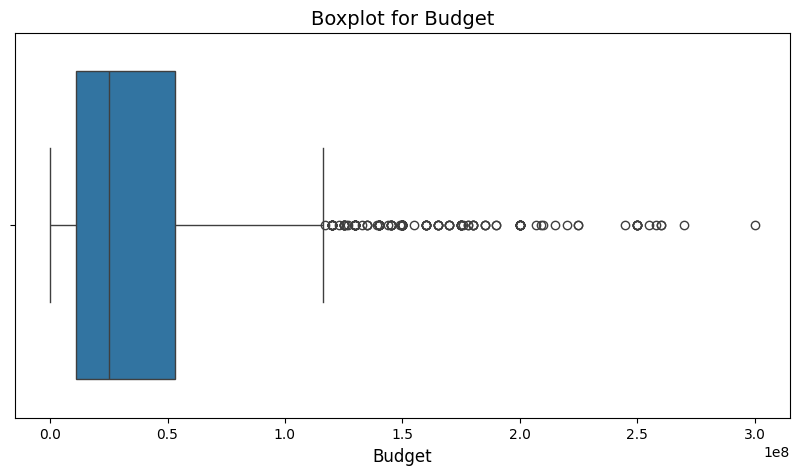

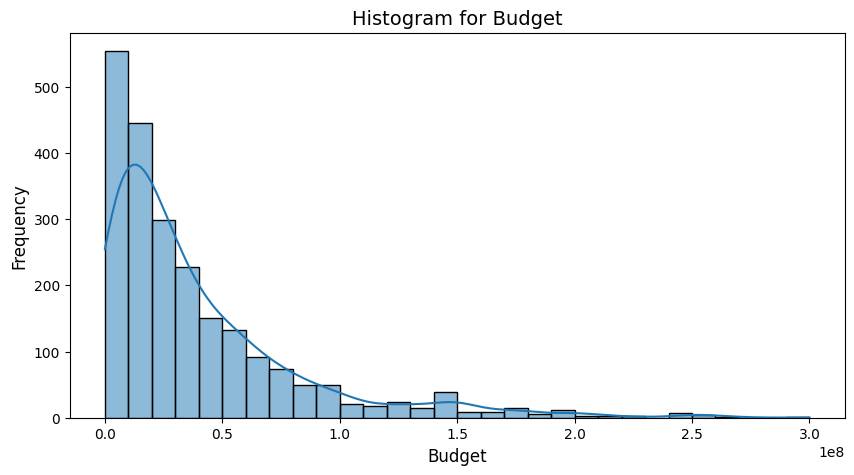

Lower bound for outliers: -52000000.0
Upper bound for outliers: 116000000.0
Number of outliers in 'budget': 158
Examples of outliers:
                                      title_y     budget
159                                Spider-Man  139000000
101                        X-Men: First Class  160000000
197  Harry Potter and the Philosopher's Stone  125000000
181                             Kung Fu Panda  130000000
358                 Atlantis: The Lost Empire  120000000


In [1807]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("Summary statistics for 'budget':")
print(cleaned_movies_df['budget'].describe())

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=cleaned_movies_df['budget'])
plt.title('Boxplot for Budget', fontsize=14)
plt.xlabel('Budget', fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(cleaned_movies_df['budget'], bins=30, kde=True)
plt.title('Histogram for Budget', fontsize=14)
plt.xlabel('Budget', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Identify potential outliers []
q1 = cleaned_movies_df['budget'].quantile(0.25)
q3 = cleaned_movies_df['budget'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Q1 (25th percentile): The value below which 25% of the data lies.
# Q3 (75th percentile): The value below which 75% of the data lies.
# IQR = Q3 - Q1.    

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

outliers = cleaned_movies_df[(cleaned_movies_df['budget'] < lower_bound) | (cleaned_movies_df['budget'] > upper_bound)]
print(f"Number of outliers in 'budget': {len(outliers)}")
print("Examples of outliers:")
print(outliers[['title_y', 'budget']].head())


Observation from the Boxplot:
- The upper threshold for outliers is 120 million (120,000,000).
- Any movie with a budget above this is considered an outlier.
- There are 216 outliers (movies with extremely high budgets) in our dataset which makes sense.

Observations from the Histrogram:
- The histogram shows a long tail on the right side, meaning there are a few movies with extremely high budgets.
- Most of the budget values are concentrated on the left (lower budgets), while only a small number of movies have very high budgets (outliers).
- y-axis in the histogram represent number of movies, and x-axis the budget.
- x-axis in the histogram is scaled in scientific notation because the budget values are very large.

Summary:
Given that Budget will be one of the most important features for our model training, removing or transforming these budget outliers could erase valuable insights how these big-budget movies like avatar impact
revenue. A log transformation would reduce the budget values, which might supress meaningful variations between small, mid-range, and high-budget movies. We will keep these outlier, and train our model to learn from this instead of discarding it.


#### Revenue

Summary statistics for 'revenue':
count    2.259000e+03
mean     1.173337e+08
std      1.718815e+08
min      5.000000e+00
25%      1.715084e+07
50%      5.470010e+07
75%      1.407819e+08
max      1.519558e+09
Name: revenue, dtype: float64


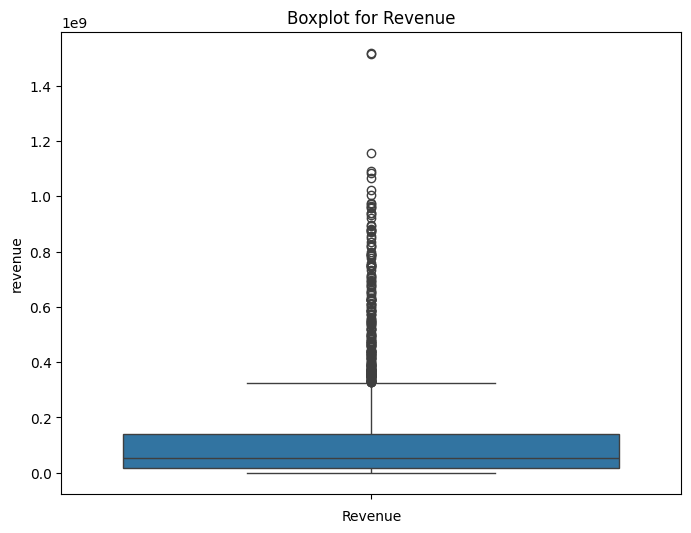

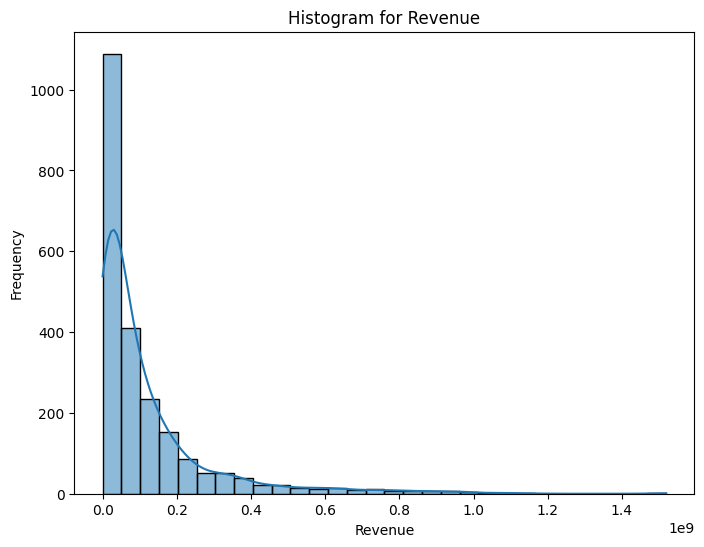


Lower bound for outliers: -168295713.0
Upper bound for outliers: 326228427.0
Number of outliers in 'revenue': 207

Examples of outliers:
                      title_y    revenue
810   Alvin and the Chipmunks  361366633
1154     Fifty Shades of Grey  571006128
159                Spider-Man  821708551
245       Tomorrow Never Dies  333011068
101        X-Men: First Class  353624124


In [1808]:
# Step 1: Summary Statistics for Revenue
revenue_summary = cleaned_movies_df['revenue'].describe()
print("Summary statistics for 'revenue':")
print(revenue_summary)

# Step 2: Boxplot to Visualize Outliers
plt.figure(figsize=(8, 6))
sns.boxplot(cleaned_movies_df['revenue'])
plt.title("Boxplot for Revenue")
plt.xlabel("Revenue")
plt.show()

# Step 3: Histogram to Visualize Distribution
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_movies_df['revenue'], kde=True, bins=30)
plt.title("Histogram for Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

# Step 4: Identify Outliers using IQR
q1_revenue = cleaned_movies_df['revenue'].quantile(0.25)
q3_revenue = cleaned_movies_df['revenue'].quantile(0.75)
iqr_revenue = q3_revenue - q1_revenue

lower_bound = q1_revenue - 1.5 * iqr_revenue
upper_bound = q3_revenue + 1.5 * iqr_revenue

outliers_revenue = cleaned_movies_df[(cleaned_movies_df['revenue'] < lower_bound) | 
                                     (cleaned_movies_df['revenue'] > upper_bound)]

print(f"\nLower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")
print(f"Number of outliers in 'revenue': {len(outliers_revenue)}")

# Step 5: Examples of Outliers
print("\nExamples of outliers:")
print(outliers_revenue[['title_y', 'revenue']].head())


Summary:
<br>
The boxplot and histogram for revenue show a heavily right-skewed distribution with numerous outliers on the higher end. These outliers represent blockbuster movies like Avatar, which have exceptionally high revenues similar to what we saw with Budget.
<br>
- Skewness:
    - The revenue data is positively skewed, as the majority of movies have relatively low revenue, and only a few movies have extremely high revenue.
<br>
- Outliers:
<br>
    - A significant number of outliers appear above the upper whisker in the boxplot.
    - These outliers are movies with extraordinarily high revenues, representing major hits.

Similar to the budget column, outliers in revenue represent critical data points since they indicate blockbuster hits. Removing these outliers might distort the analysis because:
Since our goal is to predict revenue, so high-value outliers provide essential insights into what makes movies financially successful. We will keep these outliers as well.


#### Popularity

Summary statistics for 'popularity':
count    2259.000000
mean       29.247263
std        38.608505
min         0.034259
25%        10.371292
50%        20.011435
75%        37.561118
max       875.581305
Name: popularity, dtype: float64


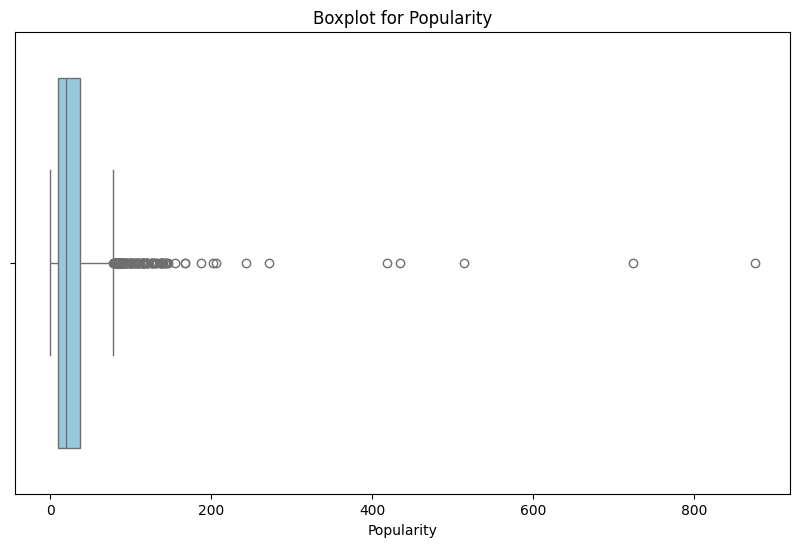

Lower bound for outliers: -30.413446500000003
Upper bound for outliers: 78.3458575
Number of outliers in 'popularity': 120
Examples of outliers:
                                       title_y  popularity
1599                        The Age of Adaline   82.052056
1154                      Fifty Shades of Grey   98.755657
159                                 Spider-Man   82.502566
197   Harry Potter and the Philosopher's Stone  109.984351
694                        The Bourne Identity   86.476817


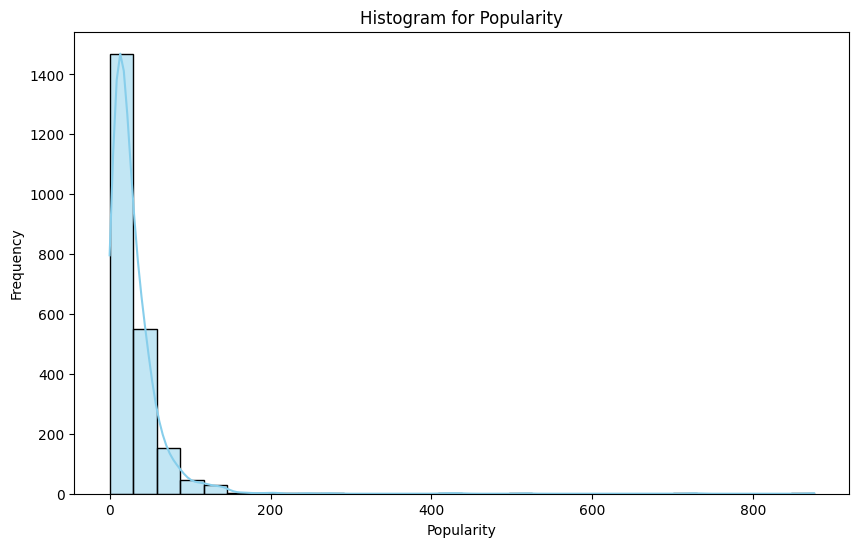

In [1809]:
# Summary statistics
print("Summary statistics for 'popularity':")
print(cleaned_movies_df['popularity'].describe())

# Boxplot for popularity
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_movies_df['popularity'], color='skyblue')
plt.title("Boxplot for Popularity")
plt.xlabel("Popularity")
plt.show()

# Calculate outlier thresholds
q1 = cleaned_movies_df['popularity'].quantile(0.25)
q3 = cleaned_movies_df['popularity'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Find outliers
outliers = cleaned_movies_df[(cleaned_movies_df['popularity'] < lower_bound) | 
                             (cleaned_movies_df['popularity'] > upper_bound)]

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")
print(f"Number of outliers in 'popularity': {outliers.shape[0]}")

# Examples of outliers
print("Examples of outliers:")
print(outliers[['title_y', 'popularity']].head())

# Histogram for popularity
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_movies_df['popularity'], bins=30, kde=True, color='skyblue')
plt.title("Histogram for Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

Summary:
The popularity distribution is highly right-skewed, with the majority of movies having a low popularity score. There are significant outliers above 78.5

We decided to not transform or remove these outliers for following reasons:
- High popularity might be one of the strongest signals for predicting high revenue. By excluding or transforming it, we would risk diminishing the relationship between popularity and revenue.
- We can later group movies by popularity tiers like low, medium, high to analyze their influence on revenue without discarding data.

#### Runtime

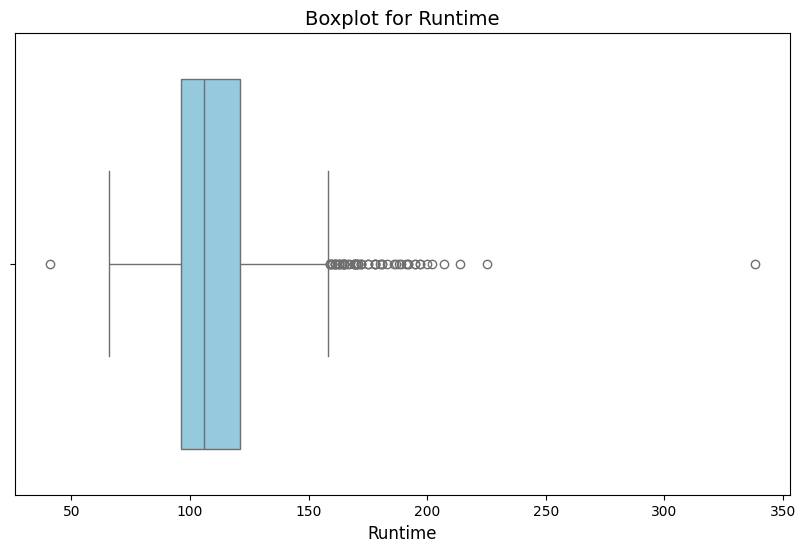

Summary statistics for 'runtime':
count    2259.000000
mean      110.280212
std        20.422200
min        41.000000
25%        96.000000
50%       106.000000
75%       121.000000
max       338.000000
Name: runtime, dtype: float64


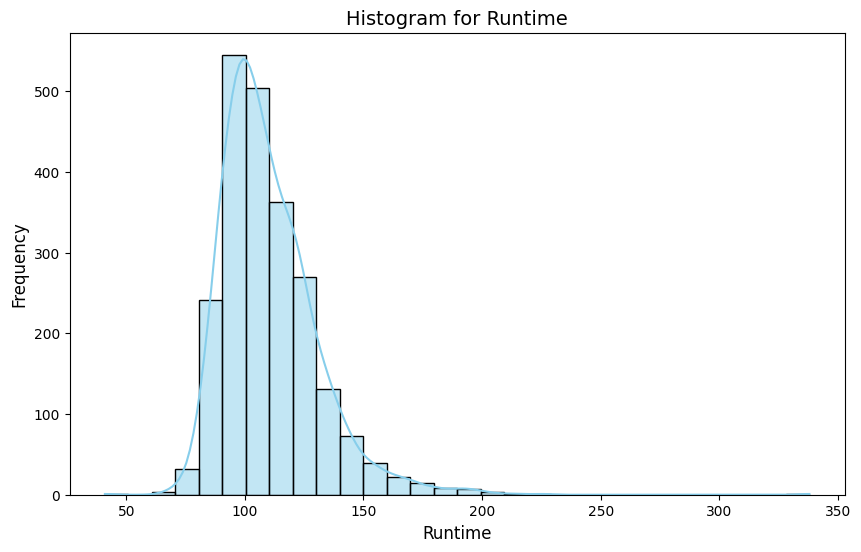

Lower bound for outliers: 58.5
Upper bound for outliers: 158.5
Number of outliers in 'runtime': 62
Examples of outliers:
                  title_y  runtime
3161  Fiddler on the Roof    181.0
650        Eyes Wide Shut    159.0
676            Wyatt Earp    191.0
892                Casino    178.0
2829               Patton    172.0


In [1810]:
# Boxplot for runtime
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_movies_df['runtime'], color="skyblue")
plt.title("Boxplot for Runtime", fontsize=14)
plt.xlabel("Runtime", fontsize=12)
plt.show()

# Summary statistics for runtime
runtime_summary = cleaned_movies_df['runtime'].describe()
print("Summary statistics for 'runtime':")
print(runtime_summary)

# Histogram for runtime
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_movies_df['runtime'], kde=True, bins=30, color="skyblue")
plt.title("Histogram for Runtime", fontsize=14)
plt.xlabel("Runtime", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Calculate IQR for runtime
Q1 = cleaned_movies_df['runtime'].quantile(0.25)
Q3 = cleaned_movies_df['runtime'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_runtime = cleaned_movies_df[(cleaned_movies_df['runtime'] < lower_bound) | (cleaned_movies_df['runtime'] > upper_bound)]
print("Lower bound for outliers:", lower_bound)
print("Upper bound for outliers:", upper_bound)
print(f"Number of outliers in 'runtime': {len(outliers_runtime)}")
print("Examples of outliers:")
print(outliers_runtime[['title_y', 'runtime']].head())

Summary:
- The mean runtime is around 110 minutes, with a standard deviation of 20.73 minutes.
- Most movies have a runtime between 96 (25th percentile) and 121 (75th percentile) minutes.
- Outliers exist, with runtimes below 58.5 minutes (unusually short) or above 158.5 minutes (unusually long).
<br>
Box Plot:
- A significant number of movies falls within the interquartile range (IQR).
- Some extreme outliers, such as "King Kong" (187 minutes), extend well beyond the upper bound.
<br>
Histrogram:
- The distribution appears roughly normal, centered around the mean, but there is a slight right skew due to longer movies.
- A large proportion of movies have runtimes between 90 and 120 minutes.

Runtime is a meaningful feature for audience engagement for us, so retaining the outliers is important to understand these patterns. If required we could group the runtimes into categories like (short, standard, long) for better interpetability.

We have decided to keep it as it is.

#### Vote Average

Summary statistics for 'vote_average':
count    2259.000000
mean        6.300089
std         0.871012
min         0.000000
25%         5.800000
50%         6.300000
75%         6.900000
max         8.300000
Name: vote_average, dtype: float64

Lower bound for outliers: 4.149999999999999
Upper bound for outliers: 8.55
Number of outliers in 'vote_average': 28
Examples of outliers:
                               title_y  vote_average
1134                 Super Mario Bros.           4.0
2228                 An American Carol           4.1
2433  Superman IV: The Quest for Peace           4.1
2194                    Disaster Movie           3.0
2872              From Justin to Kelly           3.0


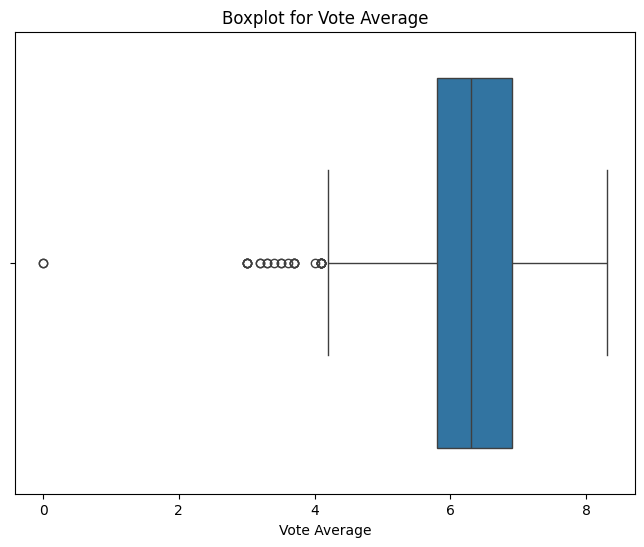

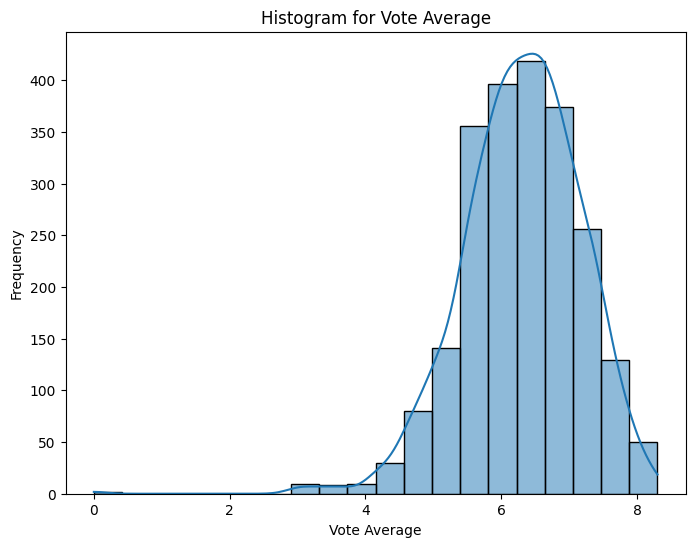

In [1811]:
# Calculate summary statistics for vote_average
vote_avg_summary = cleaned_movies_df['vote_average'].describe()
print("Summary statistics for 'vote_average':")
print(vote_avg_summary)

# Calculate IQR and outliers
q1_vote_avg = vote_avg_summary['25%']
q3_vote_avg = vote_avg_summary['75%']
iqr_vote_avg = q3_vote_avg - q1_vote_avg

lower_bound_vote_avg = q1_vote_avg - 1.5 * iqr_vote_avg
upper_bound_vote_avg = q3_vote_avg + 1.5 * iqr_vote_avg

outliers_vote_avg = cleaned_movies_df[
    (cleaned_movies_df['vote_average'] < lower_bound_vote_avg) |
    (cleaned_movies_df['vote_average'] > upper_bound_vote_avg)
]

print(f"\nLower bound for outliers: {lower_bound_vote_avg}")
print(f"Upper bound for outliers: {upper_bound_vote_avg}")
print(f"Number of outliers in 'vote_average': {len(outliers_vote_avg)}")
print("Examples of outliers:")
print(outliers_vote_avg[['title_y', 'vote_average']].head())

# Plot boxplot for vote_average
plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_movies_df['vote_average'])
plt.title("Boxplot for Vote Average")
plt.xlabel("Vote Average")
plt.show()

# Plot histogram for vote_average
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_movies_df['vote_average'], kde=True, bins=20)
plt.title("Histogram for Vote Average")
plt.xlabel("Vote Average")
plt.ylabel("Frequency")
plt.show()


Boxplot: Outliers are present on both ends, these represent movies with extremely low or high audience ratings.
<br><br>
Histogram: The distribution appears approximately normal, centered around the mean, but with some skewness due to the presence of extreme low values
<br>
<br>
Summary:
- 75% of movies have a vote average below 6.9.
- Vote averages are values reflecting audience or critic opinion. These values might provide critical insights into extreme cases like universally liked or widely disliked movies.
- These might also correlate with other features like revenue or popularity, adding value to the analysis.
<br>
<br>
Since the distribution is almost normal, a transformation like log scaling is unnecessary. We will keep it as it is.

#### Vote Count

Summary statistics for 'vote_count':
count     2259.000000
mean       977.639221
std       1428.497395
min          0.000000
25%        168.500000
50%        454.000000
75%       1147.500000
max      13752.000000
Name: vote_count, dtype: float64

Lower bound for outliers: -1300.0
Upper bound for outliers: 2616.0
Number of outliers in 'vote_count': 215
Examples of outliers:
                                       title_y  vote_count
1154                      Fifty Shades of Grey        3254
159                                 Spider-Man        5265
101                         X-Men: First Class        5181
197   Harry Potter and the Philosopher's Stone        7006
694                        The Bourne Identity        3583


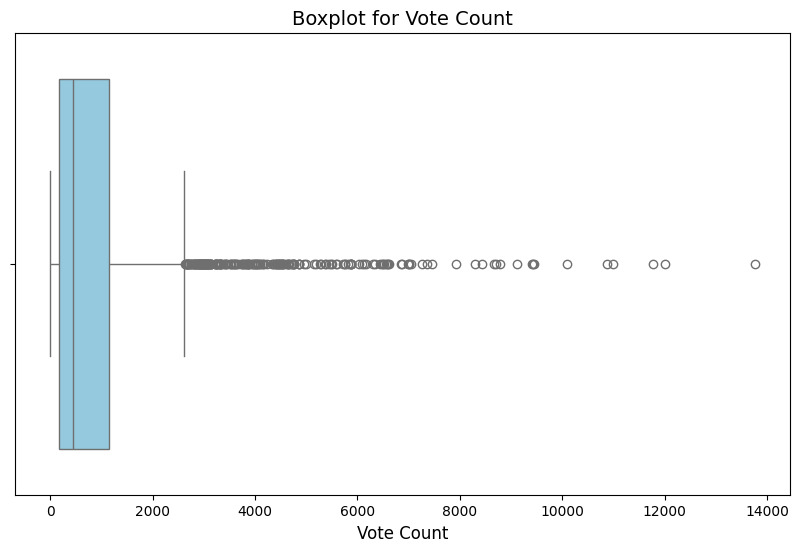

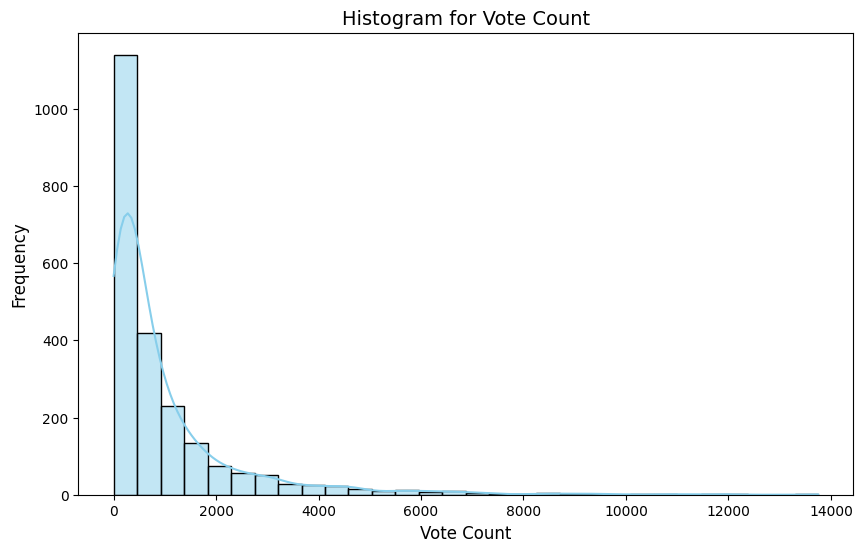

In [1812]:
# Summary statistics
print("Summary statistics for 'vote_count':")
print(cleaned_movies_df['vote_count'].describe())

# Identify outliers using IQR
Q1 = cleaned_movies_df['vote_count'].quantile(0.25)
Q3 = cleaned_movies_df['vote_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = cleaned_movies_df[(cleaned_movies_df['vote_count'] < lower_bound) | (cleaned_movies_df['vote_count'] > upper_bound)]
print(f"\nLower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")
print(f"Number of outliers in 'vote_count': {len(outliers)}")
print("Examples of outliers:")
print(outliers[['title_y', 'vote_count']].head())

# Boxplot for vote_count
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_movies_df['vote_count'], color="skyblue")
plt.title("Boxplot for Vote Count", fontsize=14)
plt.xlabel("Vote Count", fontsize=12)
plt.show()

# Histogram for vote_count
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_movies_df['vote_count'], bins=30, kde=True, color="skyblue")
plt.title("Histogram for Vote Count", fontsize=14)
plt.xlabel("Vote Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


Summary:
- Outliers like Avatar and Pirates of the Caribbean are expected because hits naturally attract more audience interaction.
- Movies with high vote counts are not data errors but instead exceptional cases. Removing them would eliminate valuable insights into audience engagement. 

We decided to perform <b> log transformation </b> on this feature as it is extremely skewed: most movies have very few votes, while a small number have exceptionally high counts and this creates an imbalance that can dominate model training and hinder its ability to generalize across all movies.

In [1813]:
import numpy as np

# Apply log transformation to 'vote_count'
cleaned_movies_df['log_vote_count'] = np.log1p(cleaned_movies_df['vote_count'])

# Display a summary of the transformed feature
print("Summary statistics for 'log_vote_count':")
print(cleaned_movies_df['log_vote_count'].describe())


Summary statistics for 'log_vote_count':
count    2259.000000
mean        6.024881
std         1.459546
min         0.000000
25%         5.132849
50%         6.120297
75%         7.046212
max         9.529012
Name: log_vote_count, dtype: float64


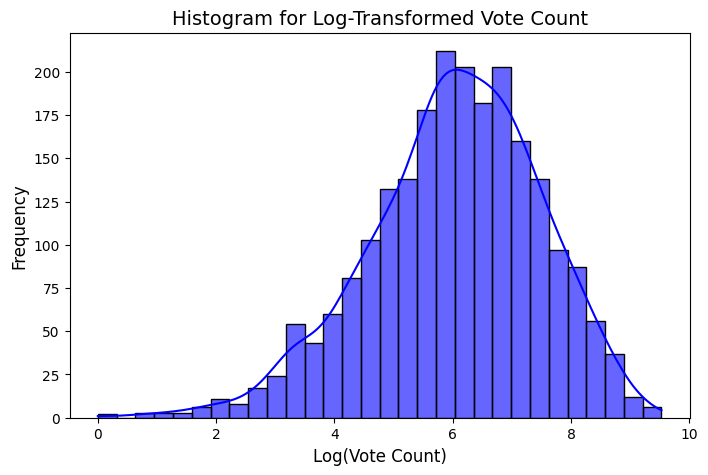

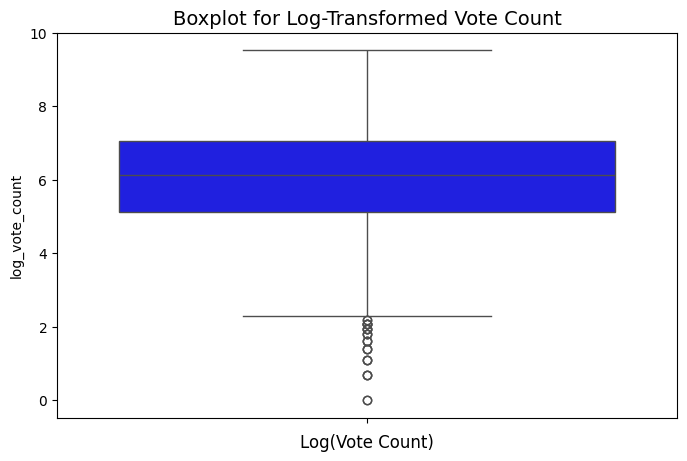

In [1814]:
#Visualize it

# Histogram of log-transformed 'vote_count'
plt.figure(figsize=(8, 5))
sns.histplot(cleaned_movies_df['log_vote_count'], bins=30, kde=True, color='blue', alpha=0.6)
plt.title('Histogram for Log-Transformed Vote Count', fontsize=14)
plt.xlabel('Log(Vote Count)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Boxplot of log-transformed 'vote_count'
plt.figure(figsize=(8, 5))
sns.boxplot(cleaned_movies_df['log_vote_count'], color='blue')
plt.title('Boxplot for Log-Transformed Vote Count', fontsize=14)
plt.xlabel('Log(Vote Count)', fontsize=12)
plt.show()


Summary after the transformation:
<br>
As per above, the transformation appears to have worked well:
<br>
- Histogram: The log-transformed histogram now indicates that the extreme skewness of the original data has been reduced significantly

- Boxplot: The range of values is now compressed, and the boxplot shows a much tighter interquartile range. While there are still outliers, they are less extreme in terms of deviation from the bulk of the data.

In [1815]:
# lets drop the original vote_count column
cleaned_movies_df = cleaned_movies_df.drop(columns=['vote_count'])

# Rename the log-transformed column to 'vote_count'
cleaned_movies_df.rename(columns={'log_vote_count': 'vote_count'}, inplace=True)

## Feature selection, and Engineering

### 5.1 Categorical columns

Identify Categorical columns

<p>Lets first print the first 5 rows to understand some of the columns</p>

In [1816]:
# Identify the categorical columns
categorical_columns = cleaned_movies_df.select_dtypes(include=['object']).columns

# Print the first 5 rows of each categorical column
print("First 5 rows of categorical columns:")
for column in categorical_columns:
    print(f"\nColumn: {column}")
    print(cleaned_movies_df[column].head())


First 5 rows of categorical columns:

Column: genres
2097    [{"id": 12, "name": "Adventure"}, {"id": 35, "...
810     [{"id": 35, "name": "Comedy"}, {"id": 10402, "...
832     [{"id": 14, "name": "Fantasy"}, {"id": 35, "na...
3862    [{"id": 53, "name": "Thriller"}, {"id": 18, "n...
1083    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

Column: keywords
2097    [{"id": 1926, "name": "car journey"}, {"id": 2...
810     [{"id": 637, "name": "pop"}, {"id": 3490, "nam...
832     [{"id": 931, "name": "jealousy"}, {"id": 3258,...
3862    [{"id": 592, "name": "capitalism"}, {"id": 460...
1083    [{"id": 339, "name": "submarine"}, {"id": 1009...
Name: keywords, dtype: object

Column: original_language
2097    en
810     en
832     en
3862    en
1083    en
Name: original_language, dtype: object

Column: original_title
2097          Are We There Yet?
810     Alvin and the Chipmunks
832           Death Becomes Her
3862                Margin Call
1083              

Quality of Data

After the merge, we now have two <b>title</b> columns representing the same information, lets drop one.

In [1817]:
# Drop the duplicate title column (title_y)
cleaned_movies_df = cleaned_movies_df.drop(columns=['title_y'])

# Rename title_x to title
cleaned_movies_df = cleaned_movies_df.rename(columns={'title_x': 'title'})

# Confirm the change
print("Columns after dropping 'title_y':")
print(cleaned_movies_df.columns)


Columns after dropping 'title_y':
Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'title', 'vote_average', 'movie_id', 'cast', 'crew', 'main_actor_names',
       'main_actor_genders', 'directors', 'writers', 'producers', 'crew_size',
       'revenue', 'vote_count'],
      dtype='object')


Since both `cast` and `crew` have been extracted as new fearures. we don't need to keep these two columns. Lets drop these.

In [1818]:
# Drop cast, and crew columns
cleaned_movies_df = cleaned_movies_df.drop(columns=['cast', 'crew'])

# Confirm the change
print("Columns after dropping 'cast' and 'crew':")
print(cleaned_movies_df.columns)

Columns after dropping 'cast' and 'crew':
Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'title', 'vote_average', 'movie_id', 'main_actor_names',
       'main_actor_genders', 'directors', 'writers', 'producers', 'crew_size',
       'revenue', 'vote_count'],
      dtype='object')


Let's look into the `keywords` column and see how can we transform it.

In [1819]:
print(cleaned_movies_df['keywords'].value_counts())

keywords
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         66
[{"id": 179431, "name": "duringcreditsstinger"}]                                                                                                                                                                                                                                 

Let's see what keywords are the most frequent among the top 20% of the movies with the highest revenue

In [1820]:
import json
from collections import Counter

# Step 1: Filter the top 20% of movies based on revenue
top_20_percent = cleaned_movies_df.nlargest(int(0.2 * len(cleaned_movies_df)), 'revenue')

# Step 2: Function to extract 'name' values from JSON-like strings
def extract_keyword_names(kw_column):
    all_keywords = []
    for entry in kw_column:
        if isinstance(entry, str) and entry.startswith("["):  # Check if entry is JSON-like
            try:
                keyword_list = json.loads(entry)  # Parse the JSON string
                names = [kw['name'] for kw in keyword_list if 'name' in kw]
                all_keywords.extend(names)
            except json.JSONDecodeError:
                pass  # Ignore rows that fail to parse
    return all_keywords

# Step 3: Extract keywords from the top 20% movies
top_keywords = extract_keyword_names(top_20_percent['keywords'])

# Step 4: Count the occurrences of each keyword
keyword_counts = Counter(top_keywords)

# Step 5: Display the top 20 most common keywords
top_20_keywords = keyword_counts.most_common(20)
print("Top 20 Most Frequent Keywords Among Top 20% Movies by Revenue:")
for keyword, count in top_20_keywords:
    print(f"{keyword}: {count}")


Top 20 Most Frequent Keywords Among Top 20% Movies by Revenue:
duringcreditsstinger: 68
3d: 38
aftercreditsstinger: 36
sequel: 36
superhero: 33
based on novel: 29
based on comic book: 27
dystopia: 25
marvel comic: 21
friendship: 17
woman director: 17
alien: 16
revenge: 16
magic: 15
saving the world: 15
violence: 15
witch: 14
secret identity: 13
dying and death: 13
super powers: 12


Let's make a column indicating with how many of the successful keywords each movie is associated.

In [1821]:
# Step 1: Use the existing keywords list 
top_20_keywords = [keyword for keyword in keyword_counts.keys()]  # Directly take the top keywords

# Step 2: Function to count matches with top 20 keywords
def count_successful_keywords(kw_entry, top_keywords):
    count = 0
    if isinstance(kw_entry, str) and kw_entry.startswith("["):  # Ensure it's valid JSON
        try:
            keyword_list = json.loads(kw_entry)  # Parse JSON-like string
            names = [kw['name'] for kw in keyword_list if 'name' in kw]  # Extract 'name' fields
            count = sum(1 for name in names if name in top_keywords)  # Count matches
        except json.JSONDecodeError:
            pass  # Skip invalid entries
    return count

# Step 3: Create a new column for successful keyword count
cleaned_movies_df['successful_keywords_count'] = cleaned_movies_df['keywords'].apply(
    lambda x: count_successful_keywords(x, top_20_keywords)
)

# Step 4: Drop the original keywords column
cleaned_movies_df = cleaned_movies_df.drop(columns=['keywords'], errors='ignore')

# Step 5: Display a sample of the updated DataFrame
print(cleaned_movies_df[['successful_keywords_count']].head())


      successful_keywords_count
2097                          3
810                          15
832                           4
3862                          2
1083                          9


Now lets see how many movies contain English as orignal language ? It might help narrow our approach to just english since our secondary dataset contains talk shows that are only in English.

In [1822]:
print(cleaned_movies_df['original_language'].value_counts())



original_language
en    2179
fr      17
zh      10
es      10
ja       7
it       5
hi       4
cn       4
ko       3
de       3
ru       3
da       2
id       2
he       1
nb       1
nl       1
te       1
pt       1
xx       1
pl       1
vi       1
is       1
th       1
Name: count, dtype: int64


Majority of our data contains English as orignal language. We have decided to drop the rows for the rest, as this helps narrow our approach to English origin films.

In [1823]:
# Step 1: Remove non-English movies by keeping rows where 'original_language' is 'en'
cleaned_movies_df = cleaned_movies_df[cleaned_movies_df['original_language'] == 'en']

# Verify the filtering worked
print(cleaned_movies_df['original_language'].value_counts())

# Step 2: Drop the 'original_language' column since it's now redundant
cleaned_movies_df = cleaned_movies_df.drop(columns=['original_language'], errors='ignore')

# Verify the column is removed
print(cleaned_movies_df.head())



original_language
en    2179
Name: count, dtype: int64
        budget                                             genres     id  \
2097  32000000  [{"id": 12, "name": "Adventure"}, {"id": 35, "...  11637   
810   60000000  [{"id": 35, "name": "Comedy"}, {"id": 10402, "...   6477   
832   55000000  [{"id": 14, "name": "Fantasy"}, {"id": 35, "na...   9374   
3862   3500000  [{"id": 53, "name": "Thriller"}, {"id": 18, "n...  50839   
1083  70000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   9381   

               original_title  popularity  \
2097        Are We There Yet?   13.590677   
810   Alvin and the Chipmunks   47.336034   
832         Death Becomes Her   29.498304   
3862              Margin Call   26.259389   
1083             Babylon A.D.   27.568194   

                                   production_companies  \
2097  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
810   [{"name": "Dune Entertainment", "id": 444}, {"...   
832          [{"name": "Universal Pictur

Lets look at Unique values in genres

In [1824]:
print("Unique values in genres:\n", cleaned_movies_df['genres'].unique()[:15])

Unique values in genres:
 ['[{"id": 12, "name": "Adventure"}, {"id": 35, "name": "Comedy"}, {"id": 10751, "name": "Family"}, {"id": 10749, "name": "Romance"}]'
 '[{"id": 35, "name": "Comedy"}, {"id": 10402, "name": "Music"}, {"id": 10751, "name": "Family"}, {"id": 14, "name": "Fantasy"}, {"id": 16, "name": "Animation"}]'
 '[{"id": 14, "name": "Fantasy"}, {"id": 35, "name": "Comedy"}]'
 '[{"id": 53, "name": "Thriller"}, {"id": 18, "name": "Drama"}]'
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}, {"id": 53, "name": "Thriller"}]'
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 35, "name": "Comedy"}, {"id": 10751, "name": "Family"}]'
 '[{"id": 10402, "name": "Music"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]'
 '[{"id": 18, "name": "Drama"}]'
 '[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]'
 '[{"id": 10749, "name": "Romance"}, {"id": 35, "

- Column contains JSON-like string containing lists of dictionaries, which indicates it needs parsing to extract useful information. We have decided that we will extract the Genre ex: `Action`, etc. We will create a new column with the extracted information, and finally drop the orignal genres column as it will no longer be relevant.

In [1825]:
import ast

def parse_genres(genres_str):

    try:
        genres_list = ast.literal_eval(genres_str)
        return [genre['name'] for genre in genres_list]
    except (ValueError, SyntaxError):
        return []

cleaned_movies_df['parsed_genres'] = cleaned_movies_df['genres'].apply(parse_genres)

# Lets verify that it worked, before we drop the original column
print("Parsed 'genres' column results:")
print(cleaned_movies_df[['id', 'genres', 'parsed_genres']].head())


Parsed 'genres' column results:
         id                                             genres  \
2097  11637  [{"id": 12, "name": "Adventure"}, {"id": 35, "...   
810    6477  [{"id": 35, "name": "Comedy"}, {"id": 10402, "...   
832    9374  [{"id": 14, "name": "Fantasy"}, {"id": 35, "na...   
3862  50839  [{"id": 53, "name": "Thriller"}, {"id": 18, "n...   
1083   9381  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       parsed_genres  
2097            [Adventure, Comedy, Family, Romance]  
810      [Comedy, Music, Family, Fantasy, Animation]  
832                                [Fantasy, Comedy]  
3862                               [Thriller, Drama]  
1083  [Action, Adventure, Science Fiction, Thriller]  


In [1826]:
# Lets drop the original column
cleaned_movies_df = cleaned_movies_df.drop(columns=['genres'])

# confirm the column has been dropped
print("Columns after dropping 'genres':")
print(cleaned_movies_df.columns)


Columns after dropping 'genres':
Index(['budget', 'id', 'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'title', 'vote_average', 'movie_id', 'main_actor_names',
       'main_actor_genders', 'directors', 'writers', 'producers', 'crew_size',
       'revenue', 'vote_count', 'successful_keywords_count', 'parsed_genres'],
      dtype='object')


The parsed_genres column contains lists of genres for each movie, a single movie can contain multiple genres. However, we need to process it further to make it more useful for analysis and modeling as machine learning models can not directly process lists.

We decided to proceed with One-Hot encoding which would create separate columns for each unique genre.
A value of `1` indicates the movie belongs to that genre.

In [1827]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

mlb = MultiLabelBinarizer()

# Apply one-hot encoding to the parsed_genres column
genres_one_hot = pd.DataFrame(mlb.fit_transform(cleaned_movies_df['parsed_genres']),
                              columns=mlb.classes_,
                              index=cleaned_movies_df.index)

# Concatenate the one-hot encoded genres back to the original DataFrame
cleaned_movies_df = pd.concat([cleaned_movies_df, genres_one_hot], axis=1)

# Verify by including the movie title alongside parsed_genres and one-hot encoded genres
columns_to_display = ['title', 'parsed_genres'] + list(genres_one_hot.columns)

# Display the first few rows
print(cleaned_movies_df[columns_to_display].head())


                        title                                   parsed_genres  \
2097        Are We There Yet?            [Adventure, Comedy, Family, Romance]   
810   Alvin and the Chipmunks     [Comedy, Music, Family, Fantasy, Animation]   
832         Death Becomes Her                               [Fantasy, Comedy]   
3862              Margin Call                               [Thriller, Drama]   
1083             Babylon A.D.  [Action, Adventure, Science Fiction, Thriller]   

      Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
2097       0          1          0       1      0            0      0       1   
810        0          0          1       1      0            0      0       1   
832        0          0          0       1      0            0      0       0   
3862       0          0          0       0      0            0      1       0   
1083       1          1          0       0      0            0      0       0   

      Fantasy  Foreign  Hi

Let's take a look at the correlation between the genre and the budget of the movie

In [1828]:
# Step 1: Select the genre columns (one-hot encoded columns)
genre_columns = [
    'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
    'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 
    'Romance', 'Science Fiction', 'Thriller', 'War'
]

# Step 2: Calculate the correlation of each genre with budget
genre_budget_correlation = cleaned_movies_df[genre_columns + ['budget']].corr()['budget'].drop('budget')

# Step 3: Display the correlations
print("Correlation of Genres with Budget:")
print(genre_budget_correlation)


Correlation of Genres with Budget:
Action             0.320150
Adventure          0.408742
Animation          0.231317
Comedy            -0.076228
Crime             -0.052073
Documentary       -0.084837
Drama             -0.203288
Family             0.203831
Fantasy            0.276405
Foreign           -0.031090
History           -0.015242
Horror            -0.154447
Music             -0.073907
Mystery           -0.011607
Romance           -0.134966
Science Fiction    0.186369
Thriller          -0.003433
War                0.010128
Name: budget, dtype: float64


We can see that some of these genres can have a significant impact on the movie's budget.

In [1829]:
# Drop the parsed_genres column
cleaned_movies_df = cleaned_movies_df.drop(columns=['parsed_genres'])

# Verify that the column has been dropped
print("Columns after dropping 'parsed_genres':")
print(cleaned_movies_df.columns)

Columns after dropping 'parsed_genres':
Index(['budget', 'id', 'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'title', 'vote_average', 'movie_id', 'main_actor_names',
       'main_actor_genders', 'directors', 'writers', 'producers', 'crew_size',
       'revenue', 'vote_count', 'successful_keywords_count', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'War', 'Western'],
      dtype='object')


 `production_companies` column.

In [1830]:
# Explore the structure of the 'production_companies' column
print("First 5 rows of 'production_companies':")
print(cleaned_movies_df['production_companies'].head())

First 5 rows of 'production_companies':
2097    [{"name": "Columbia Pictures", "id": 5}, {"nam...
810     [{"name": "Dune Entertainment", "id": 444}, {"...
832            [{"name": "Universal Pictures", "id": 33}]
3862    [{"name": "Benaroya Pictures", "id": 6692}, {"...
1083    [{"name": "StudioCanal", "id": 694}, {"name": ...
Name: production_companies, dtype: object


It contains JSON-like strings with lists of company names. 

This means we need to parse the strings to extract the `name` of the production companies.

In [1831]:
# Function to parse JSON-like strings and extract production company names
def parse_production_companies(companies_str):
    try:
        companies_list = ast.literal_eval(companies_str)  # Safely evaluate the string to a list of dictionaries
        return [company['name'] for company in companies_list]  # Extract the 'name' of each company
    except (ValueError, SyntaxError):
        return []  # Return an empty list if parsing fails
    

# Apply the function to parse production companies
cleaned_movies_df['parsed_production_companies'] = cleaned_movies_df['production_companies'].apply(parse_production_companies)

In [1832]:
# print the first 5 rows of the production_companies column
print(cleaned_movies_df['parsed_production_companies'].head())

# Drop the original column
cleaned_movies_df = cleaned_movies_df.drop(columns=['production_companies'])

2097    [Columbia Pictures, Revolution Studios, Cube V...
810     [Dune Entertainment, Regency Enterprises, Fox ...
832                                  [Universal Pictures]
3862    [Benaroya Pictures, Before the Door Pictures, ...
1083    [StudioCanal, M6 Films, Canal+, CinéCinéma, Ba...
Name: parsed_production_companies, dtype: object


It seems that a single movie might involves multiple production companies collaborating.

Having multiple companies may correlate with higher budgets or better distribution networks, potentially impacting `revenue`.

Let's see how many unique companies are, and how frequently they appear so we can figure out an approach to deal with this.

In [1833]:
from collections import Counter

# Flatten the list of production companies and count their occurrences
all_companies = [company for sublist in cleaned_movies_df['parsed_production_companies'] for company in sublist]
company_counts = Counter(all_companies)

# Convert to a DataFrame for easier analysis
company_counts_df = pd.DataFrame(company_counts.items(), columns=['Company', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display the top 20 production companies
print("Top 20 production companies by frequency:")
print(company_counts_df.head(20))

# Check how many companies occur only once
single_occurrence_count = (company_counts_df['Frequency'] == 1).sum()
print(f"\nNumber of companies that appear only once: {single_occurrence_count}")




Top 20 production companies by frequency:
                                    Company  Frequency
81                             Warner Bros.        199
7                        Universal Pictures        191
31                       Paramount Pictures        165
20   Twentieth Century Fox Film Corporation        137
0                         Columbia Pictures        118
23                          New Line Cinema         98
57                         Relativity Media         75
117               Metro-Goldwyn-Mayer (MGM)         67
35            Columbia Pictures Corporation         67
167                    Walt Disney Pictures         64
139                     Touchstone Pictures         63
153                          DreamWorks SKG         51
131               Village Roadshow Pictures         51
156                           Miramax Films         48
104                          United Artists         42
4                       Regency Enterprises         39
121                Fox 

The top 8 companies `Warner Bros`,  `Universal Pictures`, `Paramount Pictures`, `Twentieth Century Fox Film Corporation`, `Columbia Pictures`, `New Line Cinema` and `Relativity Media` appear most frequently across movies.
These companies likely have a significant impact on both movie budgets and revenues.

Approach:
One-Hot Encode the most frequent (Top -8 ) and rest in two column approach. Intitally the plan was to create columns for the top 20 companies and then creating a binary column for each of these companies to indicate their involvement in a movie, and rest in the other column. But we decided to go with the two column approach given that after the top 7, the frequency significantly reduces and it will also help reduce feature bloat caused by too many binary columns. 

The plan is as follows:
- Extract the top 8 companies by frequency 
- Create two binary columns indicating the presence of these companies in each movie `Top Companies` and `Other`

In [1834]:
# Define the top 8 companies by frequency
top_8_companies = company_counts_df.head(8)['Company'].tolist()

# Create the 'top_companies' column
cleaned_movies_df['top_companies'] = cleaned_movies_df['parsed_production_companies'].apply(
    lambda x: 1 if any(company in top_8_companies for company in x) else 0
)

# Create the 'num_companies' column to count the number of companies involved in making the movie
cleaned_movies_df['num_companies'] = cleaned_movies_df['parsed_production_companies'].apply(len)

# Verify the new columns
columns_to_display = ['title', 'parsed_production_companies', 'top_companies', 'num_companies']
print(cleaned_movies_df[columns_to_display].head())


                        title  \
2097        Are We There Yet?   
810   Alvin and the Chipmunks   
832         Death Becomes Her   
3862              Margin Call   
1083             Babylon A.D.   

                            parsed_production_companies  top_companies  \
2097  [Columbia Pictures, Revolution Studios, Cube V...              1   
810   [Dune Entertainment, Regency Enterprises, Fox ...              0   
832                                [Universal Pictures]              1   
3862  [Benaroya Pictures, Before the Door Pictures, ...              0   
1083  [StudioCanal, M6 Films, Canal+, CinéCinéma, Ba...              0   

      num_companies  
2097              3  
810               4  
832               1  
3862              4  
1083              8  


In [1835]:
# Drop the parsed_production_companies column
cleaned_movies_df = cleaned_movies_df.drop(columns=['parsed_production_companies'])

Let's see the correlation between budget and the number of companies involved as well as whether there's a top company involved

In [1836]:
# Step 1: Calculate the correlation matrix for individual influences
correlation_matrix_independent = cleaned_movies_df[['top_companies', 'num_companies', 'revenue', 'budget']].corr()

# Step 2: Extract and display independent correlations
print("Independent Influence on Revenue and Budget:")

print("\nCorrelation of Top Company Involvement with Revenue and Budget:")
print(correlation_matrix_independent.loc['top_companies', ['revenue', 'budget']])

print("\nCorrelation of Number of Companies with Revenue and Budget:")
print(correlation_matrix_independent.loc['num_companies', ['revenue', 'budget']])


Independent Influence on Revenue and Budget:

Correlation of Top Company Involvement with Revenue and Budget:
revenue    0.179013
budget     0.191817
Name: top_companies, dtype: float64

Correlation of Number of Companies with Revenue and Budget:
revenue    0.084998
budget     0.191849
Name: num_companies, dtype: float64


Lets move on to the `production_countries`

Certain countries like the US may dominate movie production.<br>
Movie production in certain countries like Canada can have an impact on the movie budget as certain countries offer Tax incentives, and lower production costs. 

In [1837]:
# Inspect the first 5 rows of 'production_countries'
print("First 5 rows of 'production_countries':")
print(cleaned_movies_df['production_countries'].head())

# Analyze unique values in the column
unique_countries = cleaned_movies_df['production_countries'].unique()
print("\nNumber of unique entries in 'production_countries':", len(unique_countries))

First 5 rows of 'production_countries':
2097    [{"iso_3166_1": "US", "name": "United States o...
810     [{"iso_3166_1": "US", "name": "United States o...
832     [{"iso_3166_1": "US", "name": "United States o...
3862    [{"iso_3166_1": "US", "name": "United States o...
1083    [{"iso_3166_1": "FR", "name": "France"}, {"iso...
Name: production_countries, dtype: object

Number of unique entries in 'production_countries': 202


- The column also requires parsing to extract the name field
- 273 unique entries indicate a significant variety, but it's likely dominated by a few frequent countries like US
    - After parsing, lets count how often each country appears to identify the most frequent ones.

In [1838]:
# Parse the Column

# Function to parse JSON-like strings and extract country codes
def parse_countries(countries_str):
    try:
        countries_list = ast.literal_eval(countries_str)  # Safely evaluate the string to a list of dictionaries
        return [country['iso_3166_1'] for country in countries_list]  # Extract the 'name' of each country
    except (ValueError, SyntaxError):
        return []  # Return an empty list if parsing fails

# Apply the function to parse production countries
cleaned_movies_df['parsed_production_countries'] = cleaned_movies_df['production_countries'].apply(parse_countries)

# Verify the parsed results
print("Parsed 'production_countries' column results:")
print(cleaned_movies_df[['production_countries', 'parsed_production_countries']].head())


Parsed 'production_countries' column results:
                                   production_countries  \
2097  [{"iso_3166_1": "US", "name": "United States o...   
810   [{"iso_3166_1": "US", "name": "United States o...   
832   [{"iso_3166_1": "US", "name": "United States o...   
3862  [{"iso_3166_1": "US", "name": "United States o...   
1083  [{"iso_3166_1": "FR", "name": "France"}, {"iso...   

     parsed_production_countries  
2097                        [US]  
810                         [US]  
832                         [US]  
3862                        [US]  
1083                    [FR, GB]  


It appears that a movie could be producted in more than a single country. Lets now look at the frequency.


Number of countries that appear only once: 14


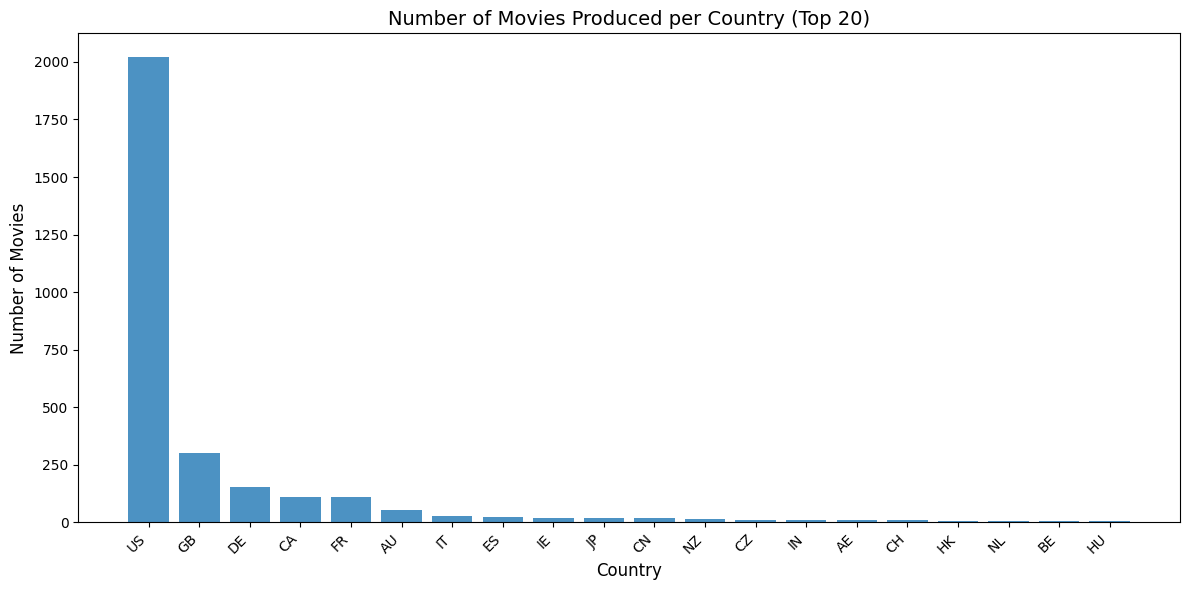

In [1839]:
import matplotlib.pyplot as plt

# Flatten the list of country codes and count occurrences
all_countries = [country for sublist in cleaned_movies_df['parsed_production_countries'] for country in sublist]
country_counts = Counter(all_countries)

# Convert to a DataFrame for easier analysis
country_counts_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Check how many countries occur only once
single_occurrence_count = (country_counts_df['Frequency'] == 1).sum()
print(f"\nNumber of countries that appear only once: {single_occurrence_count}")

# Plot the top 20 countries by frequency
plt.figure(figsize=(12, 6))
plt.bar(country_counts_df['Country'][:20], country_counts_df['Frequency'][:20], alpha=0.8)
plt.title('Number of Movies Produced per Country (Top 20)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

Observation: 
- US appears in 2892 movies, making it the most dominant production country.
- Countries like the UK, Germany, France, and Canada have significant representation but are far behind the US.
- Only 13 appear once, indicating minimal influence.



The dominance of US is likely correlated with other features like budget, popularity, or revenue. Lets explore that further with **Correlation Analysis**

In [1840]:
# Create a binary column for 'is_US'
cleaned_movies_df['is_US'] = cleaned_movies_df['parsed_production_countries'].apply(lambda x: 1 if 'US' in x else 0)

# Check correlations with numerical features
correlation_with_us = cleaned_movies_df[['is_US', 'budget', 'popularity', 'revenue']].corr()
print("Correlation of 'is_US' with key features:")
print(correlation_with_us['is_US'])


Correlation of 'is_US' with key features:
is_US         1.000000
budget        0.134261
popularity    0.071614
revenue       0.110225
Name: is_US, dtype: float64


The correlation is low but since US is overwhelmingly dominant here. We currently have 3102 rows, out of which 2892 movies were produced in United States (93%). Given this, the feature has little variability.

Since there are movies proced in multiple countries. We have decided to **create a feature representing the number of production countries** instead, as it indicates international collaborations, which could influence revenue. 

In [1841]:
# Create a feature representing the number of production countries for each movie
cleaned_movies_df['num_production_countries'] = cleaned_movies_df['parsed_production_countries'].apply(len)

# Verify the new feature
print("First 5 rows with 'num_production_countries':")
print(cleaned_movies_df[['title', 'parsed_production_countries', 'num_production_countries']].head())

# Analyze the distribution of 'num_production_countries'
country_count_distribution = cleaned_movies_df['num_production_countries'].value_counts()
print("\nDistribution of 'num_production_countries':")
print(country_count_distribution)


First 5 rows with 'num_production_countries':
                        title parsed_production_countries  \
2097        Are We There Yet?                        [US]   
810   Alvin and the Chipmunks                        [US]   
832         Death Becomes Her                        [US]   
3862              Margin Call                        [US]   
1083             Babylon A.D.                    [FR, GB]   

      num_production_countries  
2097                         1  
810                          1  
832                          1  
3862                         1  
1083                         2  

Distribution of 'num_production_countries':
num_production_countries
1     1598
2      396
3      119
4       44
5       10
0        9
8        1
6        1
12       1
Name: count, dtype: int64


Observations
- A majority of movies (2256) are produced in only one country. These are likely dominated by US-based productions.

- Movies with 2 or more countries involved (582 with 2 countries, 170 with 3 countries) indicate international collaborations, which might have unique effects on revenue.

- A few movies have a high number of production countries (6, 8, 12). These could represent co-productions across multiple regions, worth further investigation.

- Missing Values: 14 movies have 0 production countries listed.

In [1842]:
# Drop rows where 'num_production_countries' is 0
cleaned_movies_df = cleaned_movies_df[cleaned_movies_df['num_production_countries'] > 0]

# drop redundant columns
cleaned_movies_df = cleaned_movies_df.drop(columns=['production_countries'])
cleaned_movies_df = cleaned_movies_df.drop(columns=['parsed_production_countries'])
cleaned_movies_df = cleaned_movies_df.drop(columns=['is_US'])


# Verify the column has been dropped
print("Columns after dropping 'production_countries':")
print(cleaned_movies_df.columns)

Columns after dropping 'production_countries':
Index(['budget', 'id', 'original_title', 'popularity', 'release_date',
       'runtime', 'spoken_languages', 'title', 'vote_average', 'movie_id',
       'main_actor_names', 'main_actor_genders', 'directors', 'writers',
       'producers', 'crew_size', 'revenue', 'vote_count',
       'successful_keywords_count', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'Thriller', 'War', 'Western', 'top_companies',
       'num_companies', 'num_production_countries'],
      dtype='object')


The `spoken_languages` column is another important feature to explore, as it might provide insights into a movie’s accessibility or cultural reach

In [1843]:
# Inspect the first few rows of 'spoken_languages'
print("First 5 rows of 'spoken_languages':")
print(cleaned_movies_df['spoken_languages'].head())

# Check for missing values in 'spoken_languages'
missing_languages = cleaned_movies_df['spoken_languages'].isnull().sum()
print("\nMissing values in 'spoken_languages':", missing_languages)

# Analyze unique values
unique_languages = cleaned_movies_df['spoken_languages'].unique()
print("\nNumber of unique entries in 'spoken_languages':", len(unique_languages))


First 5 rows of 'spoken_languages':
2097             [{"iso_639_1": "en", "name": "English"}]
810     [{"iso_639_1": "en", "name": "English"}, {"iso...
832              [{"iso_639_1": "en", "name": "English"}]
3862             [{"iso_639_1": "en", "name": "English"}]
1083    [{"iso_639_1": "en", "name": "English"}, {"iso...
Name: spoken_languages, dtype: object

Missing values in 'spoken_languages': 0

Number of unique entries in 'spoken_languages': 286


Obersations:
- JSON-Like Strings
- 383 unique entries suggest combinations of languages, not just individual ones.

Approach:
- Extract the language codes for each movie
- Find language diversity: Add a column counting the number of spoken languages

In [1844]:

# Function to parse JSON-like strings and extract language codes
def parse_languages(languages_str):
    try:
        languages_list = ast.literal_eval(languages_str)  # Safely evaluate the string to a list of dictionaries
        return [language['iso_639_1'] for language in languages_list]  # Extract the 'iso_639_1' code
    except (ValueError, SyntaxError):
        return []  # Return an empty list if parsing fails

# Apply the function to parse spoken languages
cleaned_movies_df['parsed_spoken_languages'] = cleaned_movies_df['spoken_languages'].apply(parse_languages)

# Verify the parsed results
print(cleaned_movies_df[['parsed_spoken_languages']].head())

     parsed_spoken_languages
2097                    [en]
810         [en, es, fr, ja]
832                     [en]
3862                    [en]
1083                [en, ru]


In [1845]:
# Count the number of spoken languages for each movie
cleaned_movies_df['parsed_spoken_languages'] = cleaned_movies_df['spoken_languages'].apply(parse_languages)

# Create a feature for the number of spoken languages
cleaned_movies_df['num_spoken_languages'] = cleaned_movies_df['parsed_spoken_languages'].apply(len)

# Verify the new feature
print("First 5 rows with 'num_spoken_languages':")
print(cleaned_movies_df[['title', 'parsed_spoken_languages', 'num_spoken_languages']].head())

First 5 rows with 'num_spoken_languages':
                        title parsed_spoken_languages  num_spoken_languages
2097        Are We There Yet?                    [en]                     1
810   Alvin and the Chipmunks        [en, es, fr, ja]                     4
832         Death Becomes Her                    [en]                     1
3862              Margin Call                    [en]                     1
1083             Babylon A.D.                [en, ru]                     2


In [1846]:
# Analyze the distribution of 'num_spoken_languages'
language_count_distribution = cleaned_movies_df['num_spoken_languages'].value_counts()
print("\nDistribution of 'num_spoken_languages':")
print(language_count_distribution)


Distribution of 'num_spoken_languages':
num_spoken_languages
1    1471
2     434
3     159
4      57
5      32
6      11
8       2
7       2
0       2
Name: count, dtype: int64


In [1847]:
# Drop the redundant columns
cleaned_movies_df = cleaned_movies_df.drop(columns=['spoken_languages'])
cleaned_movies_df = cleaned_movies_df.drop(columns=['parsed_spoken_languages'])

# Verify the column has been dropped
print("Columns after dropping 'spoken_languages':")
print(cleaned_movies_df.columns)

Columns after dropping 'spoken_languages':
Index(['budget', 'id', 'original_title', 'popularity', 'release_date',
       'runtime', 'title', 'vote_average', 'movie_id', 'main_actor_names',
       'main_actor_genders', 'directors', 'writers', 'producers', 'crew_size',
       'revenue', 'vote_count', 'successful_keywords_count', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'War', 'Western',
       'top_companies', 'num_companies', 'num_production_countries',
       'num_spoken_languages'],
      dtype='object')


Let's move on to `release_date`
This is another important feature to explore, as it can provide valuable patterns like seasonal trends, summer blockbustrs, certain days. Additionally, we can refer to this when checking the appearance of stars during a movie release on talk shows.

Let's first look at the data, and come up with a plan.

In [1848]:
# Inspect the first few rows and data type of 'release_date'
print("First 5 rows of 'release_date':")
print(cleaned_movies_df['release_date'].head())

# Check for missing or invalid values
missing_dates = cleaned_movies_df['release_date'].isnull().sum()
print("\nMissing values in 'release_date':", missing_dates)

# Check the data type of 'release_date'
print("\nData type of 'release_date':", cleaned_movies_df['release_date'].dtype)


First 5 rows of 'release_date':
2097    2005-01-20
810     2007-12-13
832     1992-07-30
3862    2011-09-28
1083    2008-08-20
Name: release_date, dtype: object

Missing values in 'release_date': 0

Data type of 'release_date': object


In [1849]:
# print oldest release date
print("Oldest release date:", cleaned_movies_df['release_date'].min())

# how release date many before 2010 ?
print("Movies released before 2010:", (cleaned_movies_df['release_date'] < '2010').sum())

# Between what years were most movies released ?
release_years = cleaned_movies_df['release_date'].str[:4]
release_year_counts = release_years.value_counts().sort_index()



Oldest release date: 1916-09-04
Movies released before 2010: 1533


In [1850]:
# Convert 'release_date' to datetime format
cleaned_movies_df['release_date'] = pd.to_datetime(cleaned_movies_df['release_date'], errors='coerce')

# Extract year, month, and day of the week
cleaned_movies_df['release_year'] = cleaned_movies_df['release_date'].dt.year
cleaned_movies_df['release_month'] = cleaned_movies_df['release_date'].dt.month
cleaned_movies_df['release_dayofweek'] = cleaned_movies_df['release_date'].dt.day_name()

# Add a column for seasons
def assign_season(month):
    if pd.isna(month):
        return 'Unknown'
    elif month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

cleaned_movies_df['release_season'] = cleaned_movies_df['release_month'].apply(assign_season)

# Verify the new columns
print("First 5 rows with new release date features:")
print(cleaned_movies_df[['release_date', 'release_year', 'release_month', 'release_dayofweek', 'release_season']].head())


First 5 rows with new release date features:
     release_date  release_year  release_month release_dayofweek  \
2097   2005-01-20          2005              1          Thursday   
810    2007-12-13          2007             12          Thursday   
832    1992-07-30          1992              7          Thursday   
3862   2011-09-28          2011              9         Wednesday   
1083   2008-08-20          2008              8         Wednesday   

     release_season  
2097         Winter  
810          Winter  
832          Summer  
3862           Fall  
1083         Summer  


Do certain release seasons have an impact on revenue ?

Average revenue by season:
release_season
Summer    1.521827e+08
Spring    1.371950e+08
Winter    1.041177e+08
Fall      9.295409e+07
Name: revenue, dtype: float64


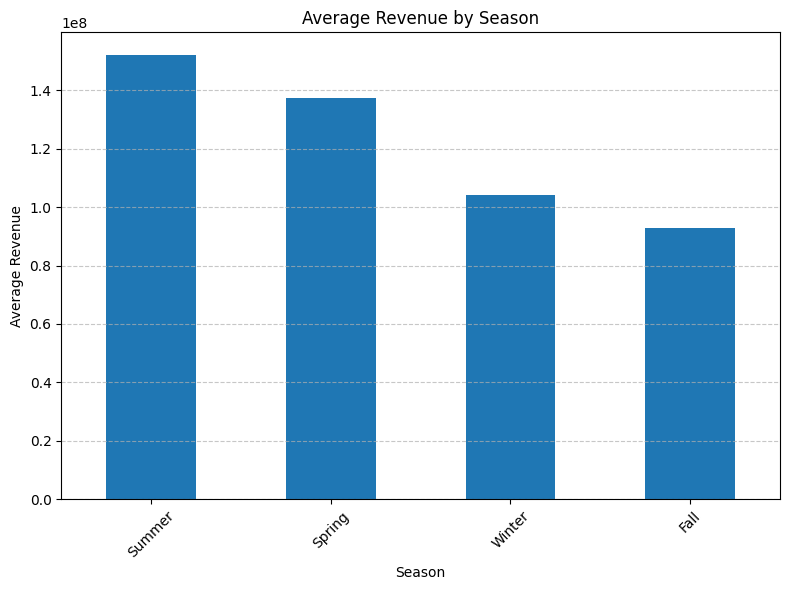

In [1851]:
# Group the data by release season and calculate the mean revenue
seasonal_revenue = cleaned_movies_df.groupby('release_season')['revenue'].mean().sort_values(ascending=False)

# Display the average revenue by season
print("Average revenue by season:")
print(seasonal_revenue)

# Plotting the results
plt.figure(figsize=(8, 6))
seasonal_revenue.plot(kind='bar')
plt.title('Average Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Observations:
<br>
This suggests that movies released in Summer and Spring generally perform better in terms of revenue. 

Analyze if these averages are driven by a few blockbusters or consistent seasonal performance.

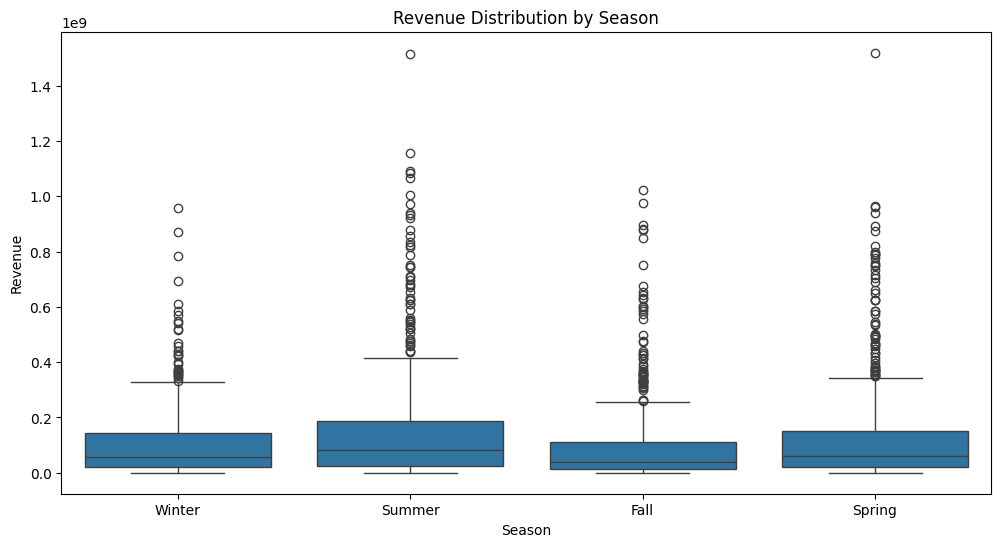

In [1852]:
# Set plot size
plt.figure(figsize=(12, 6))

# Create a box plot for revenue by season
sns.boxplot(data=cleaned_movies_df, x='release_season', y='revenue', showfliers=True)
plt.title('Revenue Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Revenue')

# Show the plot
plt.show()


The median revenues seem fairly similar across all seasons, indicating that the central tendency does not vary significantly.<br>
Lets remove the outliers and recalculate the average revenue for each season to see how much the averages are affected by blockbusters.


In [1853]:
# Remove outliers using the IQR method
Q1 = cleaned_movies_df.groupby('release_season')['revenue'].quantile(0.25)
Q3 = cleaned_movies_df.groupby('release_season')['revenue'].quantile(0.75)
IQR = Q3 - Q1

def remove_outliers(row):
    q1 = Q1[row['release_season']]
    q3 = Q3[row['release_season']]
    iqr = IQR[row['release_season']]
    return (row['revenue'] >= q1 - 1.5 * iqr) and (row['revenue'] <= q3 + 1.5 * iqr)

filtered_df = cleaned_movies_df[cleaned_movies_df.apply(remove_outliers, axis=1)]

# Recalculate average revenue without outliers
avg_revenue_no_outliers = filtered_df.groupby('release_season')['revenue'].mean()
print(avg_revenue_no_outliers)


release_season
Fall      5.624447e+07
Spring    7.168662e+07
Summer    9.938409e+07
Winter    7.979089e+07
Name: revenue, dtype: float64


In [1854]:
# Verify the changes
print(cleaned_movies_df.columns)

Index(['budget', 'id', 'original_title', 'popularity', 'release_date',
       'runtime', 'title', 'vote_average', 'movie_id', 'main_actor_names',
       'main_actor_genders', 'directors', 'writers', 'producers', 'crew_size',
       'revenue', 'vote_count', 'successful_keywords_count', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'War', 'Western',
       'top_companies', 'num_companies', 'num_production_countries',
       'num_spoken_languages', 'release_year', 'release_month',
       'release_dayofweek', 'release_season'],
      dtype='object')


Overvations: <br>
- Summer: Still leads in average revenue even without outliers, confirming that this season generally performs better, likely due to increased audience availability and the release of major blockbusters.
- Spring and Winter: Show similar average revenue levels, though Spring performs slightly better.
- Fall: Has the lowest average revenue

Lets do One-Hot Encoding, and creat features like `season_summer`, `season_winter` with binary values.

In [1855]:
# One-hot encode the 'release_season' column
season_encoded_df = pd.get_dummies(cleaned_movies_df['release_season'], prefix='season')

# Concatenate the encoded columns with the original DataFrame
cleaned_movies_df = pd.concat([cleaned_movies_df, season_encoded_df], axis=1)

# Verify the changes
print(cleaned_movies_df.columns)

Index(['budget', 'id', 'original_title', 'popularity', 'release_date',
       'runtime', 'title', 'vote_average', 'movie_id', 'main_actor_names',
       'main_actor_genders', 'directors', 'writers', 'producers', 'crew_size',
       'revenue', 'vote_count', 'successful_keywords_count', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'War', 'Western',
       'top_companies', 'num_companies', 'num_production_countries',
       'num_spoken_languages', 'release_year', 'release_month',
       'release_dayofweek', 'release_season', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter'],
      dtype='object')


In [1856]:
# Drop other features related to release date
cleaned_movies_df.drop(columns=['release_season'], inplace=True)

cleaned_movies_df.drop(columns=['release_date'], inplace=True)

cleaned_movies_df.drop(columns=['release_month'], inplace=True)

cleaned_movies_df.drop(columns=['release_dayofweek'], inplace=True)

# Verify the changes
print(cleaned_movies_df.columns)


Index(['budget', 'id', 'original_title', 'popularity', 'runtime', 'title',
       'vote_average', 'movie_id', 'main_actor_names', 'main_actor_genders',
       'directors', 'writers', 'producers', 'crew_size', 'revenue',
       'vote_count', 'successful_keywords_count', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'War', 'Western',
       'top_companies', 'num_companies', 'num_production_countries',
       'num_spoken_languages', 'release_year', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter'],
      dtype='object')


In [1857]:
pd.set_option('display.max_columns', None)  # Display all columns

cleaned_movies_df

,budget,id,original_title,popularity,runtime,title,vote_average,movie_id,main_actor_names,main_actor_genders,directors,writers,producers,crew_size,revenue,vote_count,successful_keywords_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,top_companies,num_companies,num_production_countries,num_spoken_languages,release_year,season_Fall,season_Spring,season_Summer,season_Winter
2097,32000000,11637,Are We There Yet?,13.590677,95.0,Are We There Yet?,5.2,11637,"[Ice Cube, Nia Long, Aleisha Allen]","[2, 1, 1]",[Brian Levant],[Unknown],"[Ice Cube, Dan Kolsrud, Matt Alvarez]",14,97918663,5.402677,3,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,3,1,1,2005,False,False,False,True
810,60000000,6477,Alvin and the Chipmunks,47.336034,92.0,Alvin and the Chipmunks,5.5,6477,"[Jason Lee, David Cross, Cameron Richardson]","[2, 2, 1]",[Tim Hill],[Unknown],"[Janice Karman, Ross Bagdasarian]",24,361366633,7.071573,15,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,4,1,4,2007,False,False,False,True
832,55000000,9374,Death Becomes Her,29.498304,104.0,Death Becomes Her,6.3,9374,"[Meryl Streep, Bruce Willis, Goldie Hawn]","[1, 2, 1]",[Robert Zemeckis],[Martin Donovan],"[Robert Zemeckis, Steve Starkey]",8,149022650,6.456770,4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1992,False,False,True,False
3862,3500000,50839,Margin Call,26.259389,107.0,Margin Call,6.7,50839,"[Kevin Spacey, Paul Bettany, Jeremy Irons]","[2, 2, 0]",[J.C. Chandor],[Unknown],"[Zachary Quinto, Robert Ogden Barnum, Neal Dod...",28,19504039,6.263398,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,4,1,1,2011,True,False,False,False
1083,70000000,9381,Babylon A.D.,27.568194,101.0,Babylon A.D.,5.4,9381,"[Vin Diesel, Michelle Yeoh, Mélanie Thierry]","[2, 1, 1]",[Mathieu Kassovitz],[Unknown],"[Alain Goldman, Benoît Jaubert]",72,72108608,6.517671,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,8,2,2,2008,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,40000000,7461,Vantage Point,24.862767,90.0,Vantage Point,6.2,7461,"[Dennis Quaid, Matthew Fox, Forest Whitaker]","[2, 2, 2]",[Pete Travis],[Barry Levy],[Neal H. Moritz],11,151161491,6.575076,11,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,5,1,2,2008,False,False,False,True
1218,40000000,82687,The Guilt Trip,15.283444,95.0,The Guilt Trip,5.4,82687,"[Seth Rogen, Barbra Streisand, Yvonne Strahovski]","[2, 0, 1]",[Anne Fletcher],[Unknown],"[John Goldwyn, Evan Goldberg, Lorne Michaels, ...",11,41863726,5.652489,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2012,False,False,False,True
1418,35000000,8197,Midnight in the Garden of Good and Evil,5.525544,155.0,Midnight in the Garden of Good and Evil,6.3,8197,"[John Cusack, Kevin Spacey, Jude Law]","[2, 2, 2]",[Clint Eastwood],[Unknown],"[Clint Eastwood, Arnold Stiefel]",10,25105255,5.062595,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,2,1,1,1997,True,False,False,False
913,70000000,10201,Yes Man,43.849351,104.0,Yes Man,6.4,10201,"[Jim Carrey, Zooey Deschanel, Rhys Darby]","[2, 1, 2]",[Peyton Reed],[Unknown],"[Richard D. Zanuck, David Heyman]",39,225990978,7.503290,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,1,3,2008,False,False,False,True


### 5.2 Correlation analysis

Main actors: let's see the correlation between the choice of the main actors and the key factors we want to predict. Since the actors' names cannot be processed themselves, we can transform them into a star-power indication. We can analyse in how many movies in this dataset those actors have appeared in and transform the number into star-power.

First let's analyse the number of appearances:

In [1858]:
# Extract the `main_actor_names` column and flatten the list of lists into a single list.
all_actors = cleaned_movies_df['main_actor_names'].explode()

# Count the occurrences of each actor.
actor_counts = Counter(all_actors)

# Convert the counter to a DataFrame and sort by count.
star_power_table = pd.DataFrame(actor_counts.items(), columns=['Actor', 'Count']).sort_values(by='Count', ascending=False)

# Display the top 30 actors.
top_30_actors = star_power_table.head(30)
top_30_actors

,Actor,Count
83,Robert De Niro,26
262,Johnny Depp,24
47,Matt Damon,22
291,Ben Stiller,20
46,Harrison Ford,20
7,Bruce Willis,20
200,Denzel Washington,19
181,Matthew McConaughey,18
216,Brad Pitt,18
474,Owen Wilson,18


Now, let's exchange the names in the tables with the sums of these counts and standardize them.

In [1859]:
from sklearn.preprocessing import StandardScaler

# Step 1: Create a dictionary from the star power table mapping actor names to their counts
actor_count_dict = dict(zip(star_power_table['Actor'], star_power_table['Count']))

# Step 2: Replace actor names with their counts and sum these counts for each row
def calculate_actor_occurrences_sum(actor_list):
    return sum(actor_count_dict.get(actor, 0) for actor in actor_list) if actor_list else 0

cleaned_movies_df['actor_occurrences_sum'] = cleaned_movies_df['main_actor_names'].apply(calculate_actor_occurrences_sum)

# Step 3: Standardize the resulting sums
scaler = StandardScaler()
cleaned_movies_df['standardized_actor_occurrences'] = scaler.fit_transform(
    cleaned_movies_df[['actor_occurrences_sum']]
)

# Display the sorted DataFrame
cleaned_movies_df


,budget,id,original_title,popularity,runtime,title,vote_average,movie_id,main_actor_names,main_actor_genders,directors,writers,producers,crew_size,revenue,vote_count,successful_keywords_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,top_companies,num_companies,num_production_countries,num_spoken_languages,release_year,season_Fall,season_Spring,season_Summer,season_Winter,actor_occurrences_sum,standardized_actor_occurrences
2097,32000000,11637,Are We There Yet?,13.590677,95.0,Are We There Yet?,5.2,11637,"[Ice Cube, Nia Long, Aleisha Allen]","[2, 1, 1]",[Brian Levant],[Unknown],"[Ice Cube, Dan Kolsrud, Matt Alvarez]",14,97918663,5.402677,3,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,3,1,1,2005,False,False,False,True,16,-0.138561
810,60000000,6477,Alvin and the Chipmunks,47.336034,92.0,Alvin and the Chipmunks,5.5,6477,"[Jason Lee, David Cross, Cameron Richardson]","[2, 2, 1]",[Tim Hill],[Unknown],"[Janice Karman, Ross Bagdasarian]",24,361366633,7.071573,15,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,4,1,4,2007,False,False,False,True,8,-0.893084
832,55000000,9374,Death Becomes Her,29.498304,104.0,Death Becomes Her,6.3,9374,"[Meryl Streep, Bruce Willis, Goldie Hawn]","[1, 2, 1]",[Robert Zemeckis],[Martin Donovan],"[Robert Zemeckis, Steve Starkey]",8,149022650,6.456770,4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1992,False,False,True,False,40,2.125009
3862,3500000,50839,Margin Call,26.259389,107.0,Margin Call,6.7,50839,"[Kevin Spacey, Paul Bettany, Jeremy Irons]","[2, 2, 0]",[J.C. Chandor],[Unknown],"[Zachary Quinto, Robert Ogden Barnum, Neal Dod...",28,19504039,6.263398,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,4,1,1,2011,True,False,False,False,22,0.427331
1083,70000000,9381,Babylon A.D.,27.568194,101.0,Babylon A.D.,5.4,9381,"[Vin Diesel, Michelle Yeoh, Mélanie Thierry]","[2, 1, 1]",[Mathieu Kassovitz],[Unknown],"[Alain Goldman, Benoît Jaubert]",72,72108608,6.517671,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,8,2,2,2008,False,False,True,False,11,-0.610138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,40000000,7461,Vantage Point,24.862767,90.0,Vantage Point,6.2,7461,"[Dennis Quaid, Matthew Fox, Forest Whitaker]","[2, 2, 2]",[Pete Travis],[Barry Levy],[Neal H. Moritz],11,151161491,6.575076,11,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,5,1,2,2008,False,False,False,True,25,0.710278
1218,40000000,82687,The Guilt Trip,15.283444,95.0,The Guilt Trip,5.4,82687,"[Seth Rogen, Barbra Streisand, Yvonne Strahovski]","[2, 0, 1]",[Anne Fletcher],[Unknown],"[John Goldwyn, Evan Goldberg, Lorne Michaels, ...",11,41863726,5.652489,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2012,False,False,False,True,15,-0.232876
1418,35000000,8197,Midnight in the Garden of Good and Evil,5.525544,155.0,Midnight in the Garden of Good and Evil,6.3,8197,"[John Cusack, Kevin Spacey, Jude Law]","[2, 2, 2]",[Clint Eastwood],[Unknown],"[Clint Eastwood, Arnold Stiefel]",10,25105255,5.062595,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,2,1,1,1997,True,False,False,False,33,1.464801
913,70000000,10201,Yes Man,43.849351,104.0,Yes Man,6.4,10201,"[Jim Carrey, Zooey Deschanel, Rhys Darby]","[2, 1, 2]",[Peyton Reed],[Unknown],"[Richard D. Zanuck, David Heyman]",39,225990978,7.503290,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,1,3,2008,False,False,False,True,22,0.427331


We can now drop the redundant columns and name the new column as "star power"

In [1860]:
# Drop redundant columns
columns_to_drop = ['main_actor_names', 'actor_occurrences_sum']  # Specify columns to drop
cleaned_movies_df.drop(columns=columns_to_drop, inplace=True)

# Rename the standardized column to 'star_power'
cleaned_movies_df.rename(columns={'standardized_actor_occurrences': 'star_power'}, inplace=True)

# Display the updated DataFrame
cleaned_movies_df.head()


,budget,id,original_title,popularity,runtime,title,vote_average,movie_id,main_actor_genders,directors,writers,producers,crew_size,revenue,vote_count,successful_keywords_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,top_companies,num_companies,num_production_countries,num_spoken_languages,release_year,season_Fall,season_Spring,season_Summer,season_Winter,star_power
2097,32000000,11637,Are We There Yet?,13.590677,95.0,Are We There Yet?,5.2,11637,"[2, 1, 1]",[Brian Levant],[Unknown],"[Ice Cube, Dan Kolsrud, Matt Alvarez]",14,97918663,5.402677,3,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,3,1,1,2005,False,False,False,True,-0.138561
810,60000000,6477,Alvin and the Chipmunks,47.336034,92.0,Alvin and the Chipmunks,5.5,6477,"[2, 2, 1]",[Tim Hill],[Unknown],"[Janice Karman, Ross Bagdasarian]",24,361366633,7.071573,15,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,4,1,4,2007,False,False,False,True,-0.893084
832,55000000,9374,Death Becomes Her,29.498304,104.0,Death Becomes Her,6.3,9374,"[1, 2, 1]",[Robert Zemeckis],[Martin Donovan],"[Robert Zemeckis, Steve Starkey]",8,149022650,6.456770,4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1992,False,False,True,False,2.125009
3862,3500000,50839,Margin Call,26.259389,107.0,Margin Call,6.7,50839,"[2, 2, 0]",[J.C. Chandor],[Unknown],"[Zachary Quinto, Robert Ogden Barnum, Neal Dod...",28,19504039,6.263398,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,4,1,1,2011,True,False,False,False,0.427331
1083,70000000,9381,Babylon A.D.,27.568194,101.0,Babylon A.D.,5.4,9381,"[2, 1, 1]",[Mathieu Kassovitz],[Unknown],"[Alain Goldman, Benoît Jaubert]",72,72108608,6.517671,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,8,2,2,2008,False,False,True,False,-0.610138


Let's see the correlation between the star power and movie's revenue

In [1861]:
# Calculate the correlation matrix for relevant features
correlation_matrix = cleaned_movies_df[['revenue', 'star_power', 'budget', 'popularity']].corr()

# Extract and display correlations of star power with other features
print("Correlation of Star Power with Key Features:")
print("Revenue:", correlation_matrix.loc['revenue', 'star_power'])
print("Budget:", correlation_matrix.loc['budget', 'star_power'])
print("Popularity:", correlation_matrix.loc['popularity', 'star_power'])


Correlation of Star Power with Key Features:
Revenue: 0.24078905111810434
Budget: 0.32899648898066713
Popularity: 0.19315645049516214


Since director, writer and the producers' popularity and skill could be measured by their experience we are going to use the same kind of rating for them and add it to the star_power as well.

In [1862]:

# Flatten the lists for each role and count occurrences
writer_counts = Counter([person for sublist in cleaned_movies_df['writers'] 
                         if isinstance(sublist, list) for person in sublist])
producer_counts = Counter([person for sublist in cleaned_movies_df['producers'] 
                           if isinstance(sublist, list) for person in sublist])
director_counts = Counter([person for sublist in cleaned_movies_df['directors'] 
                           if isinstance(sublist, list) for person in sublist])

# Function to create star power DataFrame with independent scalers
def create_star_power_df(counts):
    df = pd.DataFrame(list(counts.items()), columns=['Name', 'Occurrences'])
    scaler = StandardScaler()  # Independent scaler for each role
    df['Standardized_Star_Power'] = scaler.fit_transform(df[['Occurrences']])
    return df.set_index('Name')['Standardized_Star_Power']

# Create standardized star power for each role
writer_star_power = create_star_power_df(writer_counts)
producer_star_power = create_star_power_df(producer_counts)
director_star_power = create_star_power_df(director_counts)

# Function to calculate star power for individuals in each row
def calculate_movie_star_power(name_list, star_power_dict):
    if isinstance(name_list, list):
        return sum(star_power_dict.get(name, 0) for name in name_list)  # Sum star power for all names
    return 0

# Assign standardized star power for writers, producers, and directors
cleaned_movies_df['writer_star_power'] = cleaned_movies_df['writers'].apply(
    lambda x: calculate_movie_star_power(x, writer_star_power))
cleaned_movies_df['producer_star_power'] = cleaned_movies_df['producers'].apply(
    lambda x: calculate_movie_star_power(x, producer_star_power))
cleaned_movies_df['director_star_power'] = cleaned_movies_df['directors'].apply(
    lambda x: calculate_movie_star_power(x, director_star_power))

# Combine standardized star power values (including existing actor star power)
scaler_individual = StandardScaler()

# Standardize each role's star power before summing
cleaned_movies_df['writer_star_power_std'] = scaler_individual.fit_transform(
    cleaned_movies_df[['writer_star_power']].fillna(0))
cleaned_movies_df['producer_star_power_std'] = scaler_individual.fit_transform(
    cleaned_movies_df[['producer_star_power']].fillna(0))
cleaned_movies_df['director_star_power_std'] = scaler_individual.fit_transform(
    cleaned_movies_df[['director_star_power']].fillna(0))
cleaned_movies_df['actor_star_power_std'] = scaler_individual.fit_transform(
    cleaned_movies_df[['star_power']].fillna(0))  # Assuming 'star_power' exists for actors

# Add up the standardized star power values
cleaned_movies_df['total_star_power'] = (
    cleaned_movies_df['writer_star_power_std'] +
    cleaned_movies_df['producer_star_power_std'] +
    cleaned_movies_df['director_star_power_std'] +
    cleaned_movies_df['actor_star_power_std']
)

# Re-standardize the total star power
scaler_total = StandardScaler()
cleaned_movies_df['standardized_total_star_power'] = scaler_total.fit_transform(
    cleaned_movies_df[['total_star_power']]
)

# Display the resulting columns
print(cleaned_movies_df[['writer_star_power_std', 'producer_star_power_std', 
                         'director_star_power_std', 'actor_star_power_std',
                         'total_star_power', 'standardized_total_star_power']].head())


      writer_star_power_std  producer_star_power_std  director_star_power_std  \
2097               0.598996                -0.442557                 0.228959   
810                0.598996                -0.468969                -0.131130   
832               -1.668504                -0.275021                 2.749576   
3862               0.598996                -0.501856                -0.131130   
1083               0.598996                -0.468969                -0.491218   

      actor_star_power_std  total_star_power  standardized_total_star_power  
2097             -0.138561          0.246837                       0.122968  
810              -0.893084         -0.894186                      -0.445463  
832               2.125009          2.931060                       1.460187  
3862              0.427331          0.393342                       0.195954  
1083             -0.610138         -0.971328                      -0.483894  


Let's drop all of the redundant columns.

In [1863]:
# List of columns to drop
columns_to_drop = [
    'writer_star_power', 'producer_star_power', 'director_star_power', 
    'writer_star_power_std', 'producer_star_power_std', 'director_star_power_std', 
    'actor_star_power_std', 'writers', 'producers', 'directors', 'total_star_power','star_power'
]

# Drop the columns
cleaned_movies_df = cleaned_movies_df.drop(columns=columns_to_drop, errors='ignore')

# Verify the remaining columns
print("Remaining Columns:")
print(cleaned_movies_df.columns)

# Display a sample of the cleaned DataFrame
print(cleaned_movies_df.head())


Remaining Columns:
Index(['budget', 'id', 'original_title', 'popularity', 'runtime', 'title',
       'vote_average', 'movie_id', 'main_actor_genders', 'crew_size',
       'revenue', 'vote_count', 'successful_keywords_count', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'War', 'Western',
       'top_companies', 'num_companies', 'num_production_countries',
       'num_spoken_languages', 'release_year', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter', 'standardized_total_star_power'],
      dtype='object')
        budget     id           original_title  popularity  runtime  \
2097  32000000  11637        Are We There Yet?   13.590677     95.0   
810   60000000   6477  Alvin and the Chipmunks   47.336034     92.0   
832   55000000   9374        Death Becomes Her   29.498304    104.0   
3862   350000

Cast size is a numerical value therefore, we will standardize it and look into its correlation.

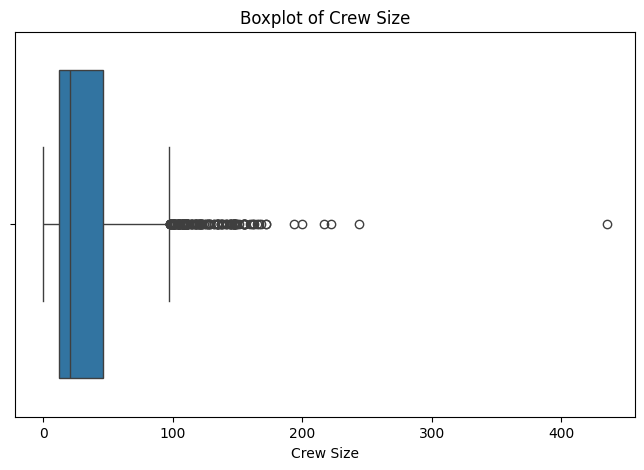

In [1864]:
# Create a boxplot for crew size
plt.figure(figsize=(8, 5))
sns.boxplot(x=cleaned_movies_df['crew_size'])
plt.title("Boxplot of Crew Size")
plt.xlabel("Crew Size")
plt.show()


The data seems very skewed. We can apply logarithmic transformation to handle it.

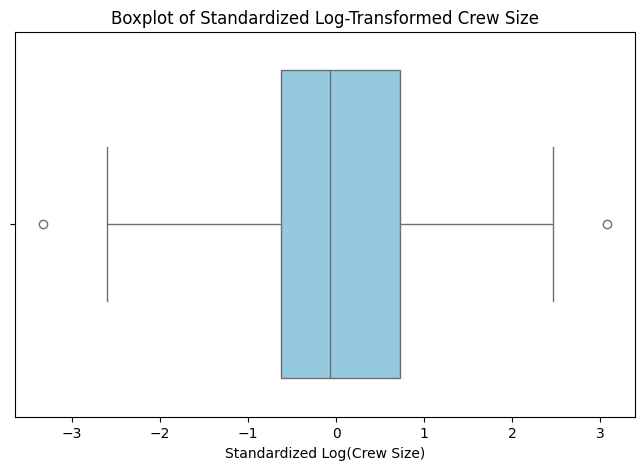

In [1865]:
scaler = StandardScaler()
# Step 1: Apply log transformation to crew size
cleaned_movies_df['log_crew_size'] = np.log1p(cleaned_movies_df['crew_size'])  # Log-transform the crew size

# Step 2: Standardize the log-transformed crew size
cleaned_movies_df['standardized_log_crew_size'] = scaler.fit_transform(
    cleaned_movies_df[['log_crew_size']]
)

cleaned_movies_df = cleaned_movies_df.drop(columns='log_crew_size')

# Step 3: Boxplot for standardized log-transformed crew size
plt.figure(figsize=(8, 5))
sns.boxplot(x=cleaned_movies_df['standardized_log_crew_size'], color="skyblue")
plt.title("Boxplot of Standardized Log-Transformed Crew Size")
plt.xlabel("Standardized Log(Crew Size)")
plt.show()


The logarithmic transormation and the standarization might be good for alorithms like linear regression however if we would like to apply for example random forest then it's better to use the raw data. Therefore, we are going to leave the untoutched columns in case we need them for the algorythms.

What correlation does the crew size have with the rest of the dataset? Let's check it for budget and genres.

In [1866]:
# Step 1: Identify the genre columns (one-hot encoded)
genre_columns = [
    'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 
    'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 
    'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War'
]

# Step 2: Calculate correlations
correlation_matrix = cleaned_movies_df[['budget', 'crew_size'] + genre_columns].corr()

# Step 3: Extract correlations
# a) Correlation between budget and crew size
budget_crewsize_correlation = correlation_matrix.loc['budget', 'crew_size']

# b) Correlation between crew size and genres
crewsize_genre_correlation = correlation_matrix.loc['crew_size', genre_columns]

# Step 4: Display results
print("Correlation Between Budget and Crew Size:")
print(budget_crewsize_correlation)

print("\nCorrelation Between Crew Size and Genres:")
print(crewsize_genre_correlation.sort_values(ascending=False))


Correlation Between Budget and Crew Size:
0.390098590640579

Correlation Between Crew Size and Genres:
Action             0.189061
Science Fiction    0.143473
Adventure          0.131359
Thriller           0.129804
Fantasy            0.087204
War                0.059959
Mystery            0.044699
Animation          0.030865
Horror             0.025519
Crime              0.024928
History            0.006344
Family            -0.028930
Foreign           -0.034029
Documentary       -0.071643
Drama             -0.072002
Music             -0.076577
Romance           -0.138974
Comedy            -0.153056
Name: crew_size, dtype: float64


The crew size has a relatively high correlation with the budget, however, it doesn't seem like a very defining factor for the genres.

In [1867]:
scaler = StandardScaler()

cleaned_movies_df['standardized_log_crew_size'] = scaler.fit_transform(
    cleaned_movies_df[['crew_size']]
)

# Check the results
print(cleaned_movies_df[['crew_size', 'standardized_log_crew_size']].head())


      crew_size  standardized_log_crew_size
2097         14                   -0.588938
810          24                   -0.309826
832           8                   -0.756404
3862         28                   -0.198182
1083         72                    1.029908


We also have information about the main actors' genders. Since we have only three main actors we can divide this information into a binary column indicating whether most of them are male or female. 

In [1868]:
# Function to determine the majority gender in a list
def majority_gender(gender_list):
    if isinstance(gender_list, list):  # Check if the value is a list
        male_count = gender_list.count(2)  # Count occurrences of '2' (male)
        female_count = gender_list.count(1)  # Count occurrences of '1' (female)
        return 1 if male_count > female_count else 0  # 1 for male majority, 0 for female majority
    return np.nan  # Handle cases where the value is not a list

# Apply the function to create a new column
cleaned_movies_df['majority_cast_gender'] = cleaned_movies_df['main_actor_genders'].apply(majority_gender)

# Display a sample of the resulting DataFrame
print(cleaned_movies_df[['main_actor_genders', 'majority_cast_gender']].head())


     main_actor_genders  majority_cast_gender
2097          [2, 1, 1]                     0
810           [2, 2, 1]                     1
832           [1, 2, 1]                     0
3862          [2, 2, 0]                     1
1083          [2, 1, 1]                     0


In [1869]:
# Drop the 'main_actor_genders' column
cleaned_movies_df = cleaned_movies_df.drop(columns=['main_actor_genders'], errors='ignore')

# Verify the column is dropped
print(cleaned_movies_df.head())


        budget     id           original_title  popularity  runtime  \
2097  32000000  11637        Are We There Yet?   13.590677     95.0   
810   60000000   6477  Alvin and the Chipmunks   47.336034     92.0   
832   55000000   9374        Death Becomes Her   29.498304    104.0   
3862   3500000  50839              Margin Call   26.259389    107.0   
1083  70000000   9381             Babylon A.D.   27.568194    101.0   

                        title  vote_average  movie_id  crew_size    revenue  \
2097        Are We There Yet?           5.2     11637         14   97918663   
810   Alvin and the Chipmunks           5.5      6477         24  361366633   
832         Death Becomes Her           6.3      9374          8  149022650   
3862              Margin Call           6.7     50839         28   19504039   
1083             Babylon A.D.           5.4      9381         72   72108608   

      vote_count  successful_keywords_count  Action  Adventure  Animation  \
2097    5.402677     

Let's see if the gender of the majority of the cast impacts the revenue.

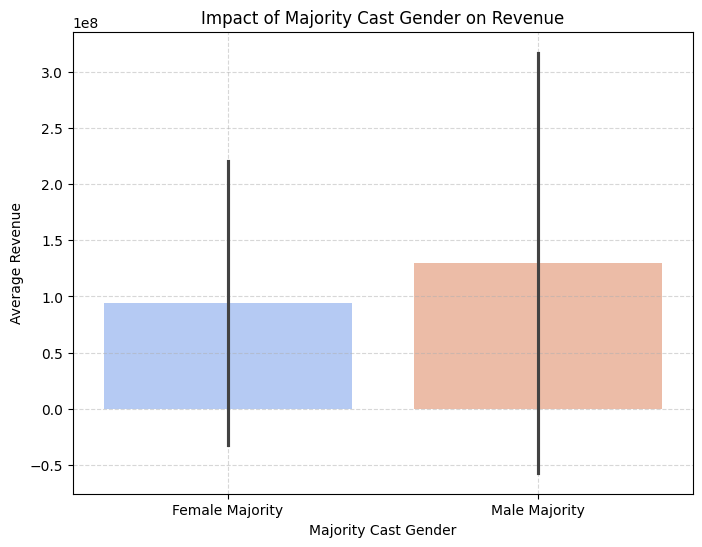

In [1870]:
# Corrected barplot for gender impact on revenue
plt.figure(figsize=(8, 6))
sns.barplot(
    data=cleaned_movies_df,
    x='majority_cast_gender',
    y='revenue',
    estimator=np.mean,  # Use np.mean to calculate the average
    errorbar='sd',  # Replaces the deprecated 'ci' parameter
    hue='majority_cast_gender',  # Explicitly set hue for the palette
    palette='coolwarm',
    dodge=False  # Aligns bars properly since hue is used
)

# Customizing labels and titles
plt.xticks(ticks=[0, 1], labels=['Female Majority', 'Male Majority'])
plt.title('Impact of Majority Cast Gender on Revenue')
plt.xlabel('Majority Cast Gender')
plt.ylabel('Average Revenue')
plt.legend([], [], frameon=False)  # Remove the redundant legend
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()


The male cast has a slightly better revenue average. The black lines indicate standard deviation, therefore in both cases the revenue can vary a lot.

Dropping redundant columns

We have kept columns like id or title so far for clarity of the analysis, however, before applying the models we want to drop them. We need to drop the target column as well.

In [1871]:
# List of columns to drop
columns_to_drop = [
    'id' , 'movie_id', 'title', 'original_title', 'revenue'
]

# Drop the columns
cleaned_movies_df = cleaned_movies_df.drop(columns=columns_to_drop, errors='ignore')

cleaned_movies_df.head()


,budget,popularity,runtime,vote_average,crew_size,vote_count,successful_keywords_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,top_companies,num_companies,num_production_countries,num_spoken_languages,release_year,season_Fall,season_Spring,season_Summer,season_Winter,standardized_total_star_power,standardized_log_crew_size,majority_cast_gender
2097,32000000,13.590677,95.0,5.2,14,5.402677,3,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,3,1,1,2005,False,False,False,True,0.122968,-0.588938,0
810,60000000,47.336034,92.0,5.5,24,7.071573,15,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,4,1,4,2007,False,False,False,True,-0.445463,-0.309826,1
832,55000000,29.498304,104.0,6.3,8,6.456770,4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1992,False,False,True,False,1.460187,-0.756404,0
3862,3500000,26.259389,107.0,6.7,28,6.263398,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,4,1,1,2011,True,False,False,False,0.195954,-0.198182,1
1083,70000000,27.568194,101.0,5.4,72,6.517671,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,8,2,2,2008,False,False,True,False,-0.483894,1.029908,0


Scaling data

We are going to use two models:
Linear Regression and Random Forest.

Since the data for Linear Regression needs to be standardized and skeweness needs to be minimized we will split out data at this point for a dataset dedicated to Linear Regression and a dataset for Random Forest.

In [1872]:
# Linear Regression dataframe

x_df = cleaned_movies_df.drop(columns='crew_size')

# Random Forest dataframe

y_df = cleaned_movies_df.drop(columns='standardized_log_crew_size')

Linear Regression dataframe

Let's take a look at the columns that still could be standardized or transformed.

<Figure size 1200x800 with 0 Axes>

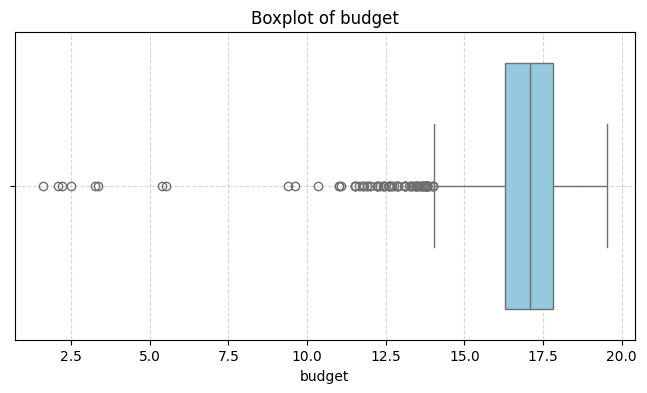

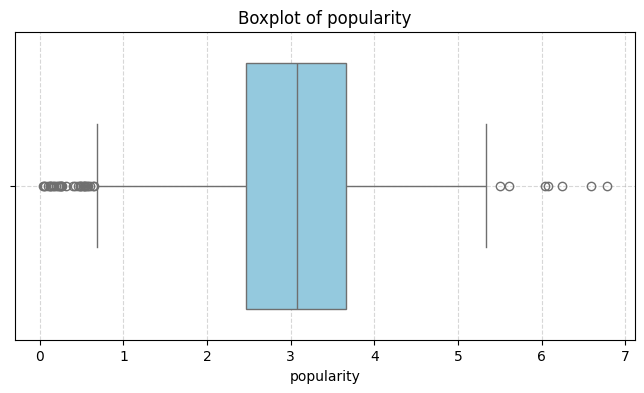

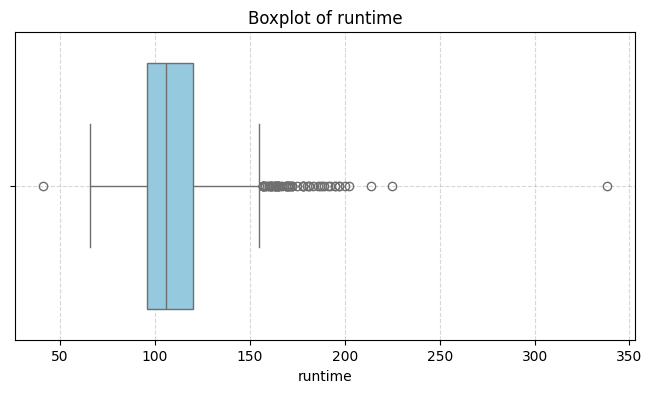

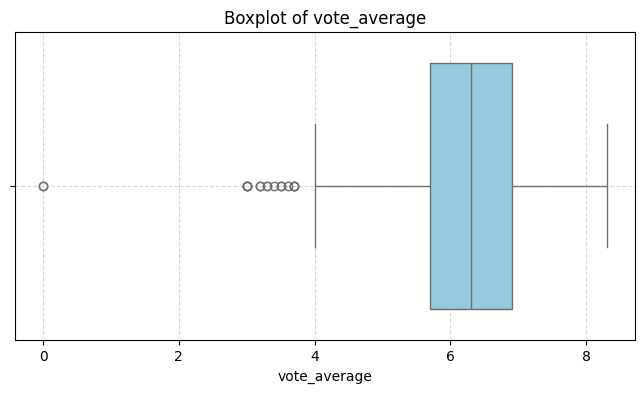

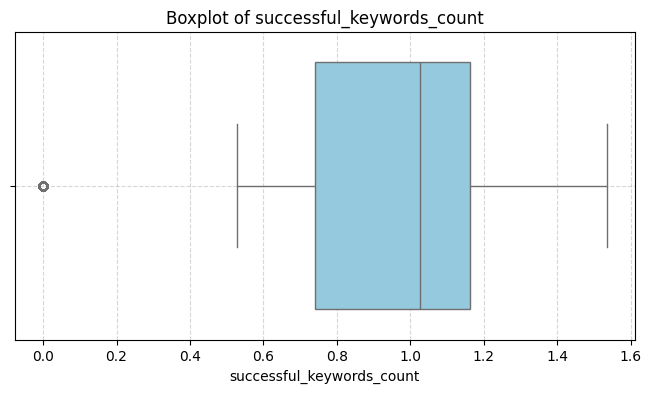

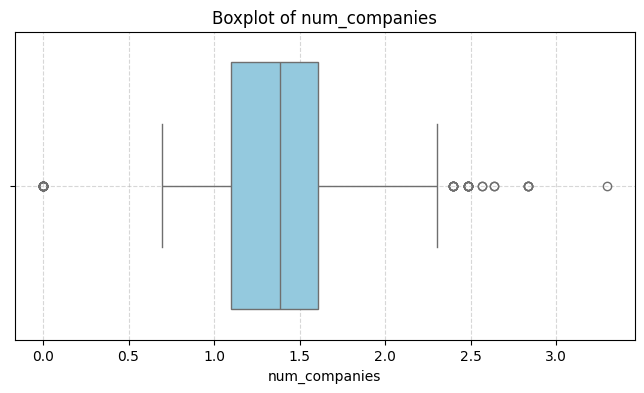

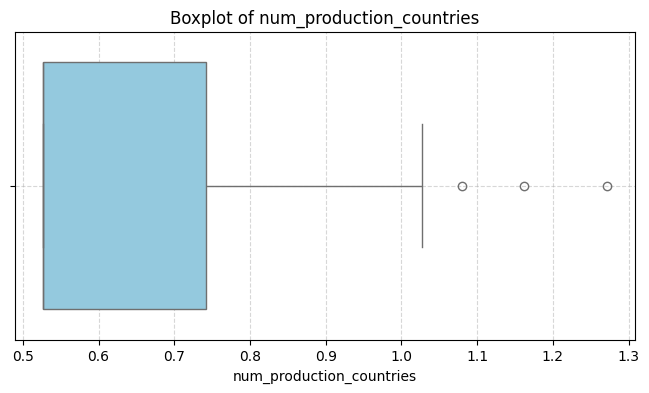

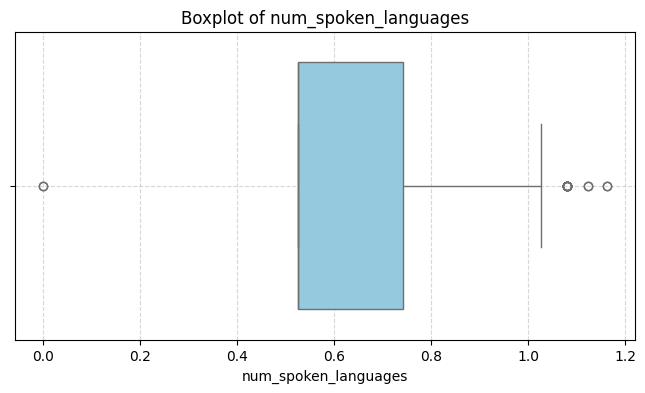

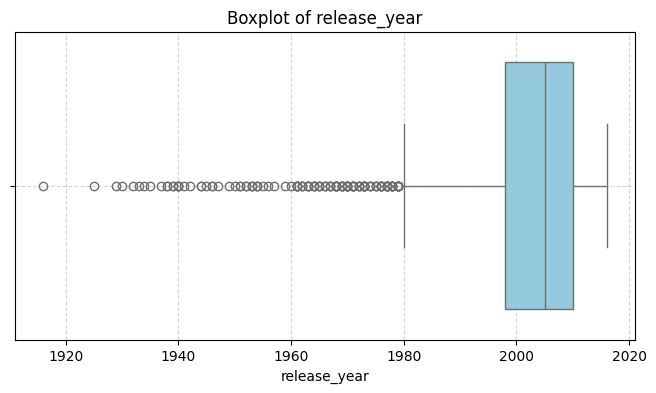

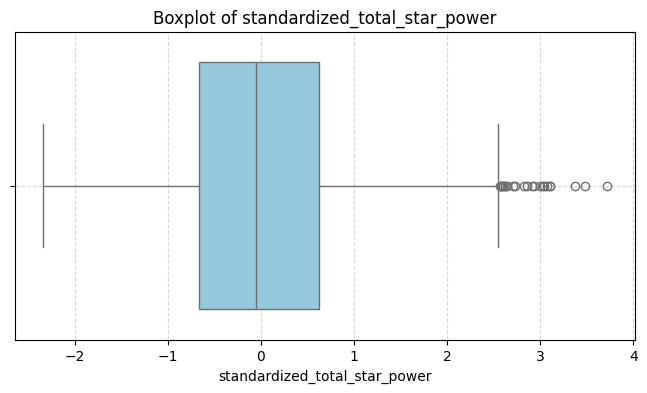

In [1876]:

# Columns to visualize with boxplots
boxplot_columns = [
    'budget', 'popularity', 'runtime', 'vote_average', 
    'successful_keywords_count', 'num_companies', 
    'num_production_countries', 'num_spoken_languages', 
    'release_year', 'standardized_total_star_power'
]

# Create boxplots for each column
plt.figure(figsize=(12, 8))  # Set the overall figure size
for i, col in enumerate(boxplot_columns):
    plt.figure(figsize=(8, 4))  # Create a new figure for each column
    sns.boxplot(data=cleaned_movies_df, x=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


The logarithmic transformation should be applied to: `num production companies`, `spoken languages`, `successful keywords count`, `num companies`, `budget` and `popularity`.

In [1875]:
# List of columns to apply logarithmic transformation
columns_to_log_transform = [
    'num_production_countries', 'num_spoken_languages',
    'successful_keywords_count', 'num_companies',
    'budget', 'popularity'
]

# Apply log transformation using np.log1p to handle zeros safely
for column in columns_to_log_transform:
    cleaned_movies_df[column] = np.log1p(cleaned_movies_df[column])

# Verify the transformation
print("Log-transformed columns:")
print(cleaned_movies_df[columns_to_log_transform].head())


Log-transformed columns:
      num_production_countries  num_spoken_languages  \
2097                  0.526589              0.526589   
810                   0.526589              0.959135   
832                   0.526589              0.526589   
3862                  0.526589              0.526589   
1083                  0.741276              0.741276   

      successful_keywords_count  num_companies     budget  popularity  
2097                   0.869742       1.386294  17.281246    2.680383  
810                    1.327761       1.609438  17.909855    3.878177  
832                    0.959135       0.693147  17.822844    3.417671  
3862                   0.741276       1.609438  15.068274    3.305398  
1083                   1.194706       2.197225  18.064006    3.352294  


The release year is highly skewed, however, maybe instead of using we can categorize it into one of the three: released before 1980, 